In [6]:
import cv2
import math
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches
from matplotlib.patches import Polygon
import os
import numpy as np

# Unpickle

In [7]:
import os
import pickle
import numpy as np

def datagen(source_folder, destination_folder):
    # List all .pkl files in the source folder
    pkl_files = [f for f in os.listdir(source_folder) if f.endswith('.pkl')]

    # Process each .pkl file
    for pkl_file in pkl_files:
        # Load the .pkl file
        with open(os.path.join(source_folder, pkl_file), 'rb') as file:
            data_dict = pickle.load(file)

        # Extract the image and save it as a numpy array
        image = data_dict['image']
        image_path = os.path.join(destination_folder, f'{os.path.splitext(pkl_file)[0]}_image.npy')
        np.save(image_path, image)

        # Process the masks
        counter = 1
        result_sum = None

        for key, value in data_dict['masks'].items():
            if key != 'vertebrae':
                # Create a mask for non-zero values
                non_zero_mask = value != 0
                # Increment the non-zero values by the counter value
                value[non_zero_mask] += counter
                # Increment the counter for the next key
                counter += 1

                # Update result_sum
                if result_sum is None:
                    result_sum = value
                else:
                    result_sum += value

        # Save the result_sum as a numpy array
        result_sum_path = os.path.join(destination_folder, f'{os.path.splitext(pkl_file)[0]}_label.npy')
        np.save(result_sum_path, result_sum)

    print("Processing completed.")

In [8]:
# datagen('/Users/ssk/Downloads/nhanes/L', '/Users/ssk/Downloads/SegPatch/test')

In [9]:
# import os
# import shutil

# # Define the source directory where the files are located
# source_directory = '/Users/ssk/Downloads/SegPatch/test'

# # Define the target directories for images and masks
# image_directory = '/Users/ssk/Downloads/SegPatch/Cervical/image'
# mask_directory = '/Users/ssk/Downloads/SegPatch/Cervical/mask'

# # Create the target directories if they don't exist
# os.makedirs(image_directory, exist_ok=True)
# os.makedirs(mask_directory, exist_ok=True)

# # List all files in the source directory
# files = os.listdir(source_directory)

# # Loop through the files and move them to the appropriate directory
# for file in files:
#     if 'image' in file:
#         shutil.move(os.path.join(source_directory, file), os.path.join(image_directory, file))
#     elif 'label' in file:
#         shutil.move(os.path.join(source_directory, file), os.path.join(mask_directory, file))

# print("Files organized into image and mask folders.")

In [10]:
# import os
# import shutil

# # Define the source directory where your files are located.
# source_directory = "/Users/ssk/Downloads/SegPatch/Lumbar"

# # Create two new directories for images and masks.
# image_directory = "/Users/ssk/Downloads/SegPatch/Lumbar/image"
# mask_directory = "/Users/ssk/Downloads/SegPatch/Lumbar/mask"

# # Ensure the target directories exist, or create them if not.
# os.makedirs(image_directory, exist_ok=True)
# os.makedirs(mask_directory, exist_ok=True)

# # List all files in the source directory.
# files = os.listdir(source_directory)

# # Iterate through the files and move them based on their names.
# for file in files:
#     if file.endswith("_image.npy"):
#         # Move image files to the image directory.
#         shutil.move(os.path.join(source_directory, file), os.path.join(image_directory, file))
#     elif file.endswith("_label.npy"):
#         # Move mask files to the mask directory.
#         shutil.move(os.path.join(source_directory, file), os.path.join(mask_directory, file))

# print("Files have been moved into separate image and mask folders.")

# Mask Viz

In [11]:
!pwd

/home/soumya/SegPatch


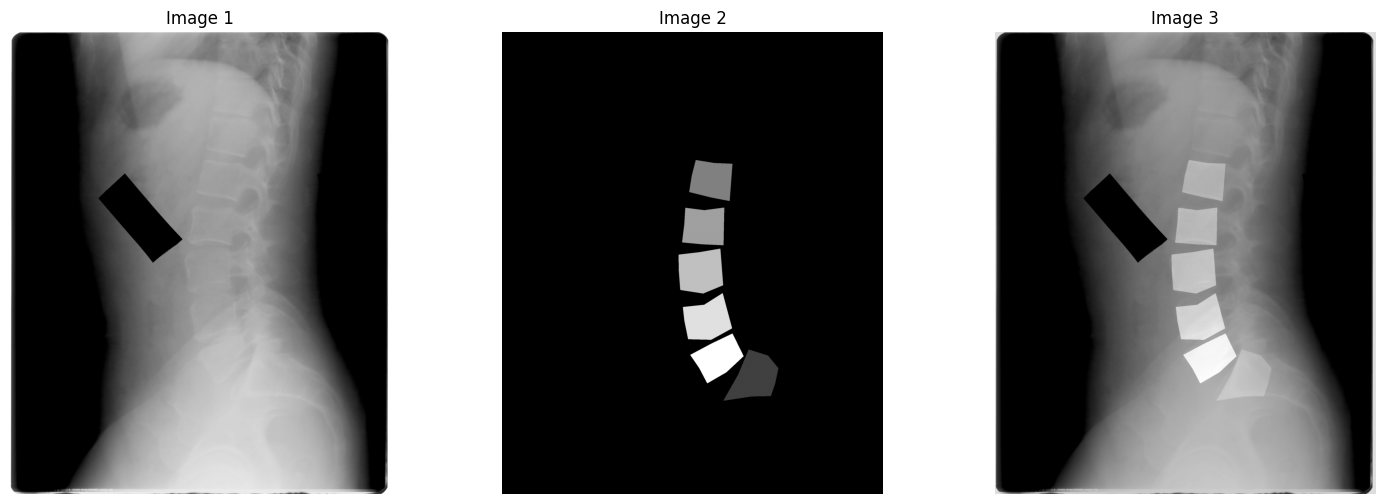

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# H = '/Users/ssk/Downloads/SegPatch/Lumbar'
H = '/home/soumya/SegPatch/Lumbar'

# Load your three numpy images (replace these with your image paths)
image1 = np.load(H + '/image/L14148_lumbar_masks_4_image.npy')
image1 = np.fliplr(image1)
image2 = np.load(H + '/mask/L14148_lumbar_masks_4_label.npy')
image2 = np.fliplr(image2)
image3 = image1 + image2 * 10

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the first image on the left subplot
axs[0].imshow(image1, cmap='gray')  # You can specify the colormap here
axs[0].set_title('Image 1')
axs[0].axis('off')  # Turn off the axis labels

# Plot the second image in the middle subplot
axs[1].imshow(image2, cmap='gray')  # You can specify the colormap here
axs[1].set_title('Image 2')
axs[1].axis('off')  # Turn off the axis labels

# Plot the third image on the right subplot
axs[2].imshow(image3, cmap='gray')  # You can specify the colormap here
axs[2].set_title('Image 3')
axs[2].axis('off')  # Turn off the axis labels

# Display the plot
plt.show()

# Test Viz
(To see difference between .npy and .tif)

Numpy is inverted!!

In [13]:
# # Load your numpy images (replace these with your actual image paths)
# image_T = cv2.imread('/content/L00327.tif')
# image_N = np.load('/content/image/L00327_lumbar_masks_4_image.npy')

# # Create a figure with multiple subplots
# plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

# # Plot the first image on the left
# plt.subplot(1, 4, 1)
# plt.imshow(cv2.cvtColor(image_T, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
# plt.axis('off')
# plt.title('Image T')

# # Plot the second image on the right
# plt.subplot(1, 4, 2)
# plt.imshow(np.fliplr(image_N), cmap='gray')  # Assuming image_N is grayscale
# plt.axis('off')
# plt.title('Image N with np.fliplr')

# # Plot the second image on the right
# plt.subplot(1, 4, 3)
# plt.imshow(image_N, cmap='gray')  # Assuming image_N is grayscale
# plt.axis('off')
# plt.title('Image N')

# # Show the plot
# plt.tight_layout()  # Ensures proper spacing between subplots
# plt.show()

In [14]:
# import cv2
# import numpy as np

# # Load the .npy image
# npy_image = image_N
# npy_image_flip = np.fliplr(npy_image)

# # Load the .tif image
# tif_image = image_T

# # Convert the .tif image to the same format as the .npy image
# tif_image = cv2.cvtColor(tif_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale, adjust as needed

# # Compare the images pixel-wise
# are_images_equal = np.array_equal(npy_image, tif_image)

# # Check if the images are equal
# if are_images_equal:
#     print("The .npy and .tif images are identical.")
# else:
#     print("The .npy and .tif images are not identical.")

# # Compare the images pixel-wise
# are_images_equal = np.array_equal(npy_image_flip, tif_image)

# # Check if the images are equal
# if are_images_equal:
#     print("The .npy (Flipped) and .tif images are identical.")
# else:
#     print("The .npy and .tif images are not identical.")

# Collecting Osteophyte Location
From .sorted.marks file

In [16]:
# Define the folder path you want to iterate through
# marks_path = "/Users/ssk/Downloads/SegPatch/marks/L"
H = '/home/soumya/SegPatch/'
marks_path = H + 'Marks/L'

# Iterate through the files in the folder
for filename in os.listdir(marks_path):
    file_path = os.path.join(marks_path, filename)

    # Check if the item in the folder is a file and has the ".sorted.marks" extension
    if os.path.isfile(file_path) and filename.endswith(".sorted.marks"):
        # Generate the new file name with the ".txt" extension
        new_filename = os.path.splitext(filename)[0] + ".txt"

        # Rename the file
        os.rename(file_path, os.path.join(marks_path, new_filename))

print("Files renamed successfully.")

## extract osteophytes

# Function to process a single file
def process_file(file_path):
    filtered_lines = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

        for line in lines:
            line = line.strip()
            # Check if the line is not empty and starts with a digit
            if line and line[0].isdigit():
                # Split the line into columns
                columns = line.split('\t')
                # Check if the 4th column value is 8 or 9
                if columns[3] == '8' or columns[3] == '9':
                    filtered_lines.append(line)

    # Write the filtered lines back to the file
    with open(file_path, 'w') as file:
        file.write('\n'.join(filtered_lines))

# Directory containing the text files
directory = marks_path

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):  # Process only .txt files
        file_path = os.path.join(directory, filename)
        process_file(file_path)

print("Processing completed.")

Files renamed successfully.
Processing completed.


In [17]:
# Define the folder path you want to iterate through
folder_path = marks_path

# Initialize an empty list to store dictionaries for each file
osteophytes = []

# Iterate through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Check if the file has a .txt extension
        file_path = os.path.join(folder_path, filename)

        with open(file_path, 'r') as file:
            # Initialize a dictionary to store the osteophyte for this file
            file_osteophyte_dict = {"File": filename[:6]}  # Use the first 6 characters of the filename as "Filename" value
            file_osteophyte = []

            # Read each line in the file
            for line in file:
                # Split the line into values based on whitespace (assuming space-separated values)
                values = line.strip().split()

                # Extract the first two values as a tuple and append it to the list
                if len(values) >= 2:
                    first_two_values = (int(values[0]), int(values[1]))
                    file_osteophyte.append(first_two_values)

            # Add the file osteophyte to the dictionary
            file_osteophyte_dict["osteophyte"] = file_osteophyte

            # Append the file's dictionary to the list
            osteophytes.append(file_osteophyte_dict)

# osteophytes
osteophytes

[{'File': 'L03496', 'osteophyte': [(1048, 821)]},
 {'File': 'L04531', 'osteophyte': [(1138, 925), (962, 1615), (962, 1888)]},
 {'File': 'L04231',
  'osteophyte': [(1100, 622),
   (1102, 722),
   (1069, 884),
   (1052, 981),
   (1075, 1204),
   (1105, 1351),
   (1119, 1454)]},
 {'File': 'L00393', 'osteophyte': [(1070, 995), (1045, 1165), (1047, 1580)]},
 {'File': 'L03614', 'osteophyte': [(643, 1384), (724, 1669)]},
 {'File': 'L02886', 'osteophyte': [(942, 479), (663, 1138)]},
 {'File': 'L03228', 'osteophyte': []},
 {'File': 'L01139',
  'osteophyte': [(1049, 883),
   (992, 1090),
   (880, 1365),
   (780, 1645),
   (749, 1935)]},
 {'File': 'L00325',
  'osteophyte': [(1026, 884),
   (978, 1080),
   (963, 1136),
   (912, 1347),
   (908, 1371),
   (828, 1677),
   (831, 1718),
   (891, 1925),
   (908, 2036)]},
 {'File': 'L01232',
  'osteophyte': [(521, 1185),
   (520, 1368),
   (509, 1449),
   (525, 1623),
   (550, 1697)]},
 {'File': 'L01078',
  'osteophyte': [(618, 1399), (599, 1448), (632, 

# Problem 1:
Osteophyte do not fit into normal bounding box

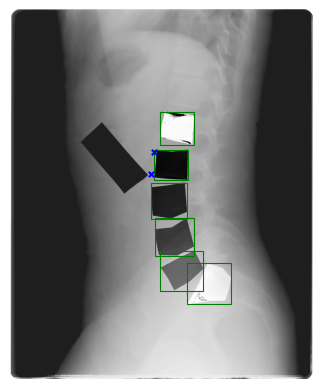

In [19]:
image_number = '48'
H = '/home/soumya/SegPatch/Lumbar'

image = np.load(H  + '/image/L141' + image_number + '_lumbar_masks_4_image.npy')
image = np.fliplr(image)

mask = np.load(H  + '/mask/L141' + image_number + '_lumbar_masks_4_label.npy')
mask = np.fliplr(mask)
mask = mask.astype(np.uint8)

# Get contours and centroids
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through contours using a counter variable
for contour_idx in range(len(contours)):
    # Get the current contour
    c = contours[contour_idx]

    # Get the centroid of the current contour
    moments = cv2.moments(c)
    if moments['m00'] != 0:
        centroid_x = int(moments['m10'] / moments['m00'])
        centroid_y = int(moments['m01'] / moments['m00'])
    else:
        centroid_x, centroid_y = 0, 0

    # Initialize next contour's centroid with the same values as the current one
    next_centroid_x, next_centroid_y = centroid_x, centroid_y

    # Check if it's not the last contour to calculate the next centroid
    if contour_idx < len(contours) - 1:
        next_moments = cv2.moments(contours[contour_idx + 1])
        if next_moments['m00'] != 0:
            next_centroid_x = int(next_moments['m10'] / next_moments['m00'])
            next_centroid_y = int(next_moments['m01'] / next_moments['m00'])

    # If it's the last contour and there's a previous contour, copy the values from the previous contour  ### ISSUES OF USING MIDPOINT
    elif contour_idx == len(contours) - 1 and contour_idx > 0:
        prev_moments = cv2.moments(contours[contour_idx - 1])
        if prev_moments['m00'] != 0:
            next_centroid_x = int(prev_moments['m10'] / prev_moments['m00'])
            next_centroid_y = int(prev_moments['m01'] / prev_moments['m00'])

    # Get the bounding rectangle for the current contour
    x, y, w, h = cv2.boundingRect(c)
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, linewidth=0.8, color='green'))

# Remove the grid and the axes
plt.axis('off')

# Show the image with bounding rectangles and rotated rectangles
plt.imshow(image + mask*20, cmap='gray')

# Find the dictionary with 'File' key equal to 'L00327'
second_file_osteophyte_list = None
for entry in osteophytes:
    if entry['File'] == 'L14148':
        second_file_osteophyte_list = entry
        break

# Extract the 'osteophyte' coordinates from the second file
if second_file_osteophyte_list:
    osteophyte_coordinates = second_file_osteophyte_list['osteophyte']

# Plot the osteophyte_coordinates on the image
for point in osteophyte_coordinates:
    plt.scatter(point[0], point[1], color='blue', marker='x', s=15)  # Invert the coordinates for (row, column)
plt.show()

#  Solution 1: Expanding Mask Bounding Boxes

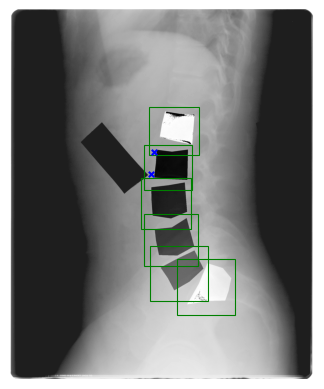

In [20]:
image_number = '48'

image = np.load(H  + '/image/L141' + image_number + '_lumbar_masks_4_image.npy')
image = np.fliplr(image)

mask = np.load(H  + '/mask/L141' + image_number + '_lumbar_masks_4_label.npy')
mask = np.fliplr(mask)
mask = mask.astype(np.uint8)

# Get contours and centroids
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through contours using a counter variable
for contour_idx in range(len(contours)):
    # Get the current contour
    c = contours[contour_idx]

    # Get the centroid of the current contour
    moments = cv2.moments(c)
    if moments['m00'] != 0:
        centroid_x = int(moments['m10'] / moments['m00'])
        centroid_y = int(moments['m01'] / moments['m00'])
    else:
        centroid_x, centroid_y = 0, 0

    # Initialize next contour's centroid with the same values as the current one
    next_centroid_x, next_centroid_y = centroid_x, centroid_y

    # Check if it's not the last contour to calculate the next centroid
    if contour_idx < len(contours) - 1:
        next_moments = cv2.moments(contours[contour_idx + 1])
        if next_moments['m00'] != 0:
            next_centroid_x = int(next_moments['m10'] / next_moments['m00'])
            next_centroid_y = int(next_moments['m01'] / next_moments['m00'])

    # If it's the last contour and there's a previous contour, copy the values from the previous contour  ### ISSUES OF USING MIDPOINT
    elif contour_idx == len(contours) - 1 and contour_idx > 0:
        prev_moments = cv2.moments(contours[contour_idx - 1])
        if prev_moments['m00'] != 0:
            next_centroid_x = int(prev_moments['m10'] / prev_moments['m00'])
            next_centroid_y = int(prev_moments['m01'] / prev_moments['m00'])

    # Get the bounding rectangle for the current contour
    x, y, w, h = cv2.boundingRect(c)
    extension = [100, 100]
    shift = [70, 30]
    plt.gca().add_patch(plt.Rectangle((x - shift[0], y - shift[1]), w + extension[0], h + extension[1], fill=False, linewidth=0.8, color='green'))

plt.axis('off')

# Show the image with bounding rectangles and rotated rectangles
plt.imshow(image + mask*20, cmap='gray')

# Find the dictionary with 'File' key equal to 'L00327'
second_file_osteophyte_list = None
for entry in osteophytes:
    if entry['File'] == 'L141' + image_number:
        second_file_osteophyte_list = entry
        break

# Extract the 'osteophyte' coordinates from the second file
if second_file_osteophyte_list:
    osteophyte_coordinates = second_file_osteophyte_list['osteophyte']

# Plot the osteophyte_coordinates on the image
for point in osteophyte_coordinates:
    plt.scatter(point[0], point[1], color='blue', marker='x', s=15)  # Invert the coordinates for (row, column)
plt.show()

# Collecting Image Variables to Extact Seg Masks

In [21]:
def calculate_next_centroid(contours, contour_idx):
    # Get the current contour
    c = contours[contour_idx]
    moments = cv2.moments(c)

    # Get the centroid of the current contour
    if moments['m00'] != 0:
        centroid_x = int(moments['m10'] / moments['m00'])
        centroid_y = int(moments['m01'] / moments['m00'])
    else:
        centroid_x, centroid_y = 0, 0

    # Initialize next contour's centroid with the same values as the current one
    next_centroid_x, next_centroid_y = centroid_x, centroid_y

    # Check if it's not the last contour to calculate the next centroid
    if contour_idx < len(contours) - 1:
        next_moments = cv2.moments(contours[contour_idx + 1])
        if next_moments['m00'] != 0:
            next_centroid_x = int(next_moments['m10'] / next_moments['m00'])
            next_centroid_y = int(next_moments['m01'] / next_moments['m00'])

    # If it's the last contour and there's a previous contour, copy the values from the previous contour
    elif contour_idx == len(contours) - 1 and contour_idx > 0:
        prev_moments = cv2.moments(contours[contour_idx - 1])
        if prev_moments['m00'] != 0:
            next_centroid_x = int(prev_moments['m10'] / prev_moments['m00'])
            next_centroid_y = int(prev_moments['m01'] / prev_moments['m00'])

            # Shift the last contour vertically by 10 units
            next_centroid_y += 10

    return centroid_x, centroid_y, next_centroid_x, next_centroid_y, c

In [22]:
def process_image(image_path, mask_path):
    image = np.load(image_path)
    image = np.fliplr(image)
    mask = np.load(mask_path)
    mask = np.fliplr(mask)
    mask = mask.astype(np.uint8)

    Centroids = []
    Corners = []

    extension = [100, 100]
    shift = [70, 30]

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through contours using a counter variable
    for contour_idx in range(len(contours)):
        centroid_x, centroid_y, next_centroid_x, next_centroid_y, c = calculate_next_centroid(contours, contour_idx)

        x, y, w, h = cv2.boundingRect(c)
        rectangle = plt.Rectangle((x - shift[0], y - shift[1]), w + extension[0], h + extension[1], fill=False, linewidth=0.8, color='green')

        # Append the corner coordinates to the Corners list
        x1, y1 = rectangle.get_xy()
        x2, y2 = x1 + rectangle.get_width(), y1 + rectangle.get_height()
        Corners.append([(x1, y1), (x2, y1), (x1, y2), (x2, y2)])

        # Add the rectangle to the current plot
        # plt.gca().add_patch(rectangle)

        Centroids.append([centroid_x, centroid_y])

    # Show the image with bounding rectangles and rotated rectangles
    # plt.imshow(image + 50 * mask)
    # plt.show()

    return Centroids, Corners

    ## make new folder image and mask and put them there for lumbar

In [36]:
# import os
# import shutil

# # Define the source directory where the files are currently located.
# source_directory = '/Users/ssk/Downloads/SegPatch/test_nhanes_processed'

# # Define the destination directories for images and masks.
# image_destination = source_directory + '/image'
# mask_destination = source_directory + '/mask'

# # Ensure that the destination directories exist. If not, create them.
# os.makedirs(image_destination, exist_ok=True)
# os.makedirs(mask_destination, exist_ok=True)

# # List all files in the source directory.
# files = os.listdir(source_directory)

# # Loop through the files and move them to the appropriate folders.
# for file in files:
#     if file.endswith('_image.npy'):
#         destination_path = os.path.join(image_destination, file)
#     elif file.endswith('_label.npy'):
#         destination_path = os.path.join(mask_destination, file)
#     else:
#         print(f"File '{file}' doesn't match the expected naming convention. Skipping.")
#         continue

#     source_path = os.path.join(source_directory, file)
    
#     # Move the file to the appropriate folder.
#     shutil.move(source_path, destination_path)
#     print(f"Moved '{file}' to the {image_destination if '_image.npy' in file else mask_destination} folder.")

# # Once the loop finishes, all files should be moved to their respective folders.
# print("All files have been moved to their respective folders.")


File '.DS_Store' doesn't match the expected naming convention. Skipping.
File 'image' doesn't match the expected naming convention. Skipping.
File 'mask' doesn't match the expected naming convention. Skipping.
All files have been moved to their respective folders.


In [23]:
import cv2
import math
import matplotlib.pyplot as plt
import os
import numpy as np

# Set the paths for your image and mask folders
images_folder = H + '/image'
masks_folder = H + '/mask'
Lumbar_Dictionary = []

# Iterate through the image files
for image_filename in os.listdir(images_folder):
    image_path = os.path.join(images_folder, image_filename)

    # Match the mask filename based on the first 6 characters
    mask_filename = image_filename[:6] + "_lumbar_masks_4_label.npy"
    mask_path = os.path.join(masks_folder, mask_filename)

    if os.path.exists(mask_path):
        Centroids, Corners = process_image(image_path, mask_path)
    else:
        print(f"Matching mask not found for {image_filename}")

    # Create a dictionary for the image/mask pair
    result_dict = {
        'File': image_filename[:6],  # Assuming filename is defined somewhere
        'Corners': Corners,
        'Centroid': Centroids
    }

    Lumbar_Dictionary.append(result_dict)

Lumbar_Dictionary

[{'File': 'L00378',
  'Corners': [[(1023, 2059), (1378, 2059), (1023, 2385), (1378, 2385)],
   [(836, 1953), (1224, 1953), (836, 2331), (1224, 2331)],
   [(737, 1771), (1090, 1771), (737, 2136), (1090, 2136)],
   [(709, 1554), (1041, 1554), (709, 1872), (1041, 1872)],
   [(693, 1328), (1042, 1328), (693, 1622), (1042, 1622)],
   [(724, 1097), (1084, 1097), (724, 1409), (1084, 1409)],
   [(771, 902), (1128, 902), (771, 1201), (1128, 1201)]],
  'Centroid': [[1226, 2216],
   [1056, 2118],
   [933, 1929],
   [893, 1694],
   [892, 1458],
   [926, 1237],
   [972, 1037]]},
 {'File': 'L00321',
  'Corners': [[(877, 2037), (1337, 2037), (877, 2368), (1337, 2368)],
   [(780, 1822), (1197, 1822), (780, 2252), (1197, 2252)],
   [(746, 1584), (1145, 1584), (746, 1936), (1145, 1936)],
   [(745, 1314), (1166, 1314), (745, 1633), (1166, 1633)],
   [(779, 1039), (1193, 1039), (779, 1370), (1193, 1370)],
   [(828, 767), (1246, 767), (828, 1108), (1246, 1108)]],
  'Centroid': [[1141, 2196],
   [1016, 2014

# Combine Collected Data
Osteophytes and Masks

In [24]:
merged_data = []

for item2 in osteophytes:
    for item1 in Lumbar_Dictionary:
        if item1['File'] == item2['File']:
            merged_item = {**item1, **item2}
            merged_data.append(merged_item)

print(merged_data)

[{'File': 'L03496', 'Corners': [[(1034, 1765), (1459, 1765), (1034, 2125), (1459, 2125)], [(1013, 1522), (1388, 1522), (1013, 1856), (1388, 1856)], [(959, 1300), (1339, 1300), (959, 1631), (1339, 1631)], [(913, 1073), (1281, 1073), (913, 1377), (1281, 1377)], [(950, 801), (1324, 801), (950, 1148), (1324, 1148)], [(1028, 543), (1411, 543), (1028, 909), (1411, 909)], [(1119, 310), (1484, 310), (1119, 666), (1484, 666)]], 'Centroid': [[1283, 1917], [1223, 1678], [1167, 1452], [1115, 1202], [1162, 954], [1247, 702], [1329, 464]], 'osteophyte': [(1048, 821)]}, {'File': 'L04531', 'Corners': [[(908, 1797), (1257, 1797), (908, 2154), (1257, 2154)], [(887, 1573), (1239, 1573), (887, 1897), (1239, 1897)], [(910, 1336), (1310, 1336), (910, 1670), (1310, 1670)], [(975, 1104), (1374, 1104), (975, 1449), (1374, 1449)], [(1030, 891), (1403, 891), (1030, 1225), (1403, 1225)], [(1071, 692), (1441, 692), (1071, 1009), (1441, 1009)]], 'Centroid': [[1103, 1950], [1086, 1709], [1130, 1481], [1196, 1257], [

In [25]:
# New filename pattern
# new_filename_pattern = "/Users/ssk/Downloads/SegPatch/test_nhanes_processed/image/{}_lumbar_masks_4_image.npy"
new_filename_pattern = H + "/image/{}_lumbar_masks_4_image.npy"

# Replace the 'filename' value in each dictionary entry
for entry in merged_data:
    entry['File'] = new_filename_pattern.format(entry['File'])

# Print the updated dictionary
for entry in merged_data:
    print(entry)

{'File': '/home/soumya/SegPatch/Lumbar/image/L03496_lumbar_masks_4_image.npy', 'Corners': [[(1034, 1765), (1459, 1765), (1034, 2125), (1459, 2125)], [(1013, 1522), (1388, 1522), (1013, 1856), (1388, 1856)], [(959, 1300), (1339, 1300), (959, 1631), (1339, 1631)], [(913, 1073), (1281, 1073), (913, 1377), (1281, 1377)], [(950, 801), (1324, 801), (950, 1148), (1324, 1148)], [(1028, 543), (1411, 543), (1028, 909), (1411, 909)], [(1119, 310), (1484, 310), (1119, 666), (1484, 666)]], 'Centroid': [[1283, 1917], [1223, 1678], [1167, 1452], [1115, 1202], [1162, 954], [1247, 702], [1329, 464]], 'osteophyte': [(1048, 821)]}
{'File': '/home/soumya/SegPatch/Lumbar/image/L04531_lumbar_masks_4_image.npy', 'Corners': [[(908, 1797), (1257, 1797), (908, 2154), (1257, 2154)], [(887, 1573), (1239, 1573), (887, 1897), (1239, 1897)], [(910, 1336), (1310, 1336), (910, 1670), (1310, 1670)], [(975, 1104), (1374, 1104), (975, 1449), (1374, 1449)], [(1030, 891), (1403, 891), (1030, 1225), (1403, 1225)], [(1071, 6

## Dummy Viz

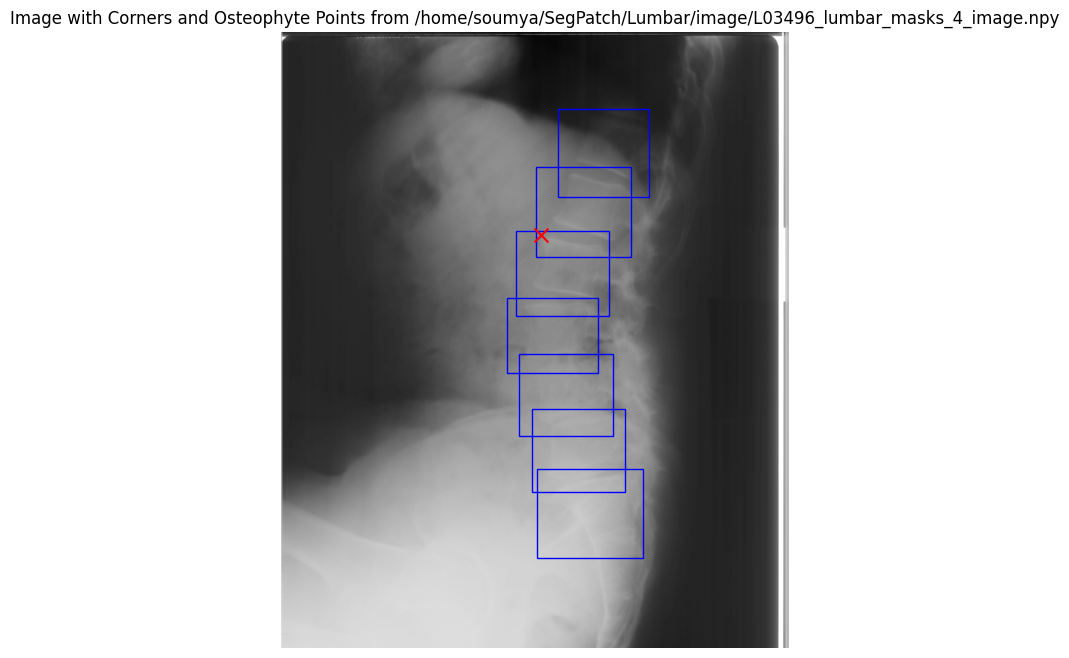

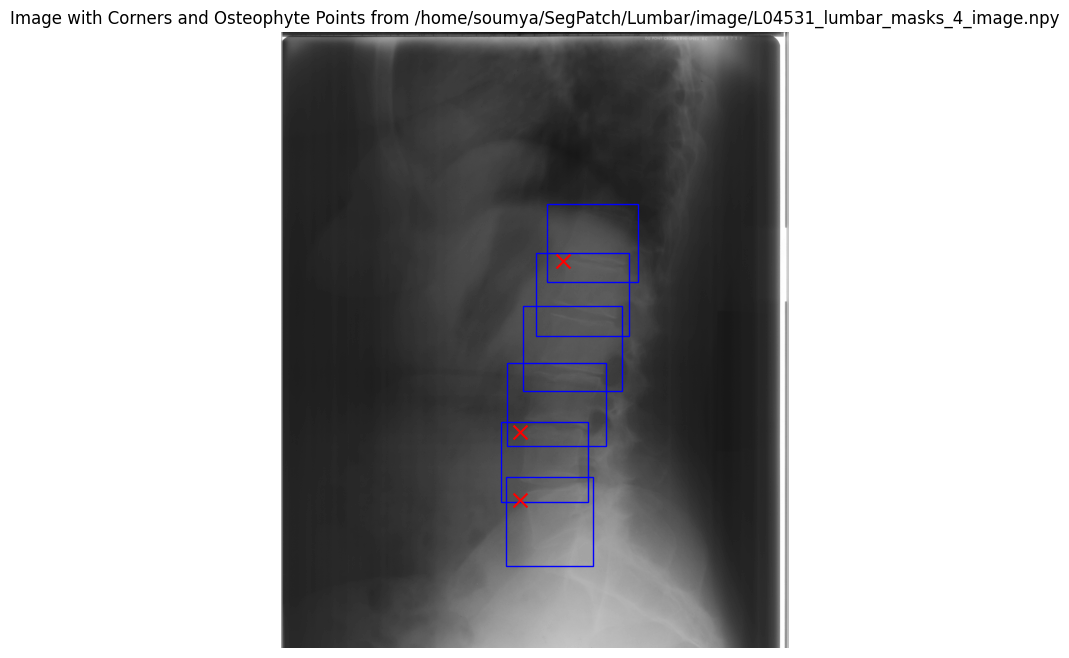

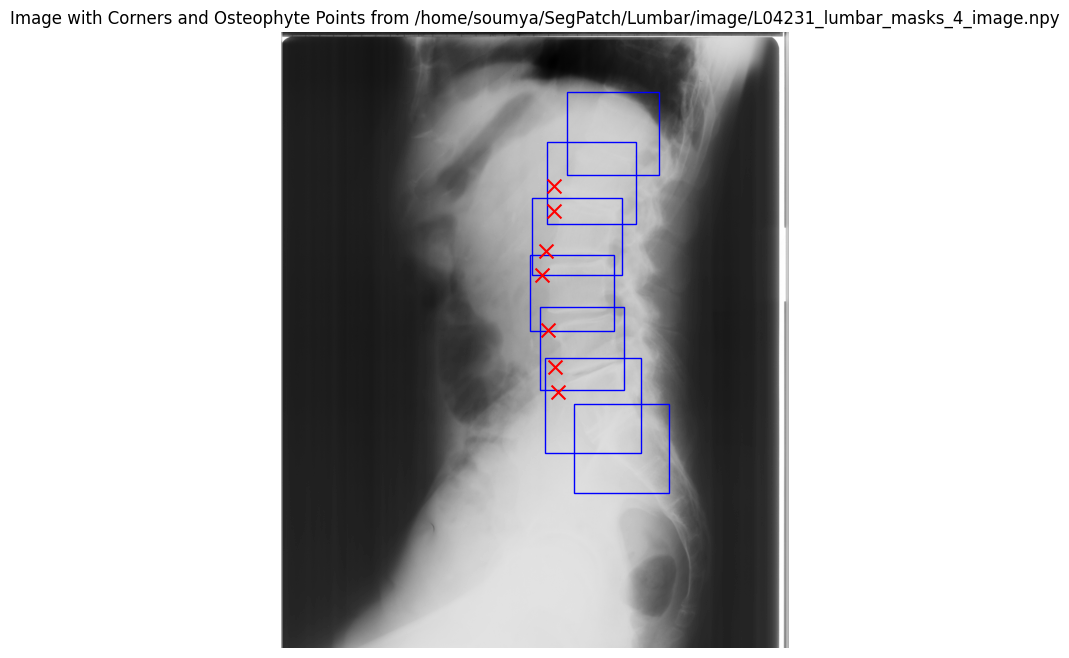

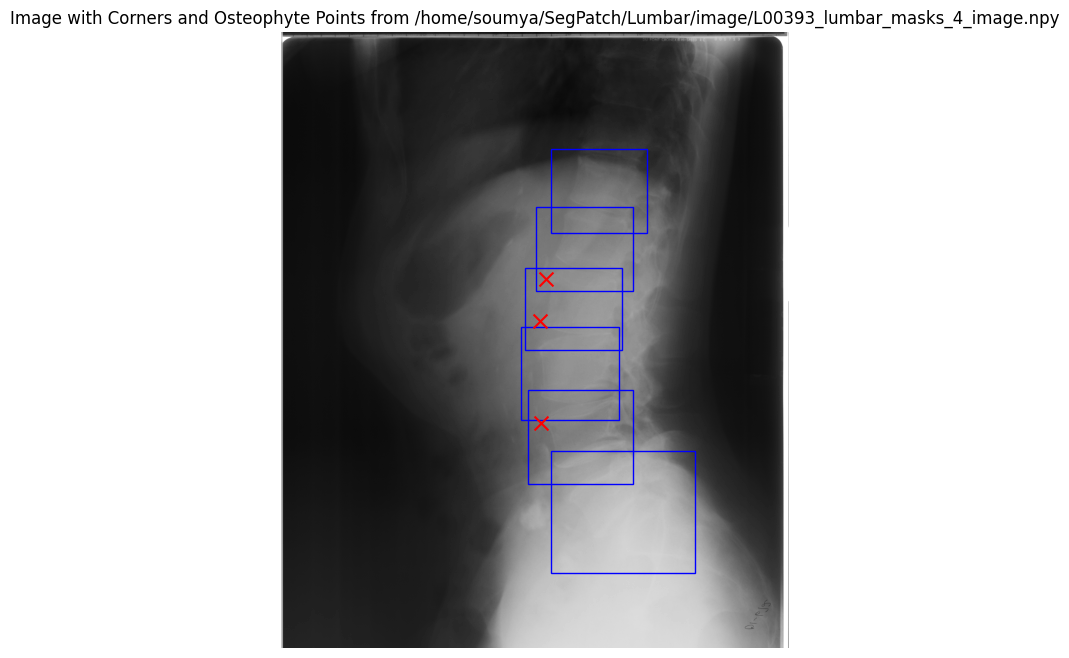

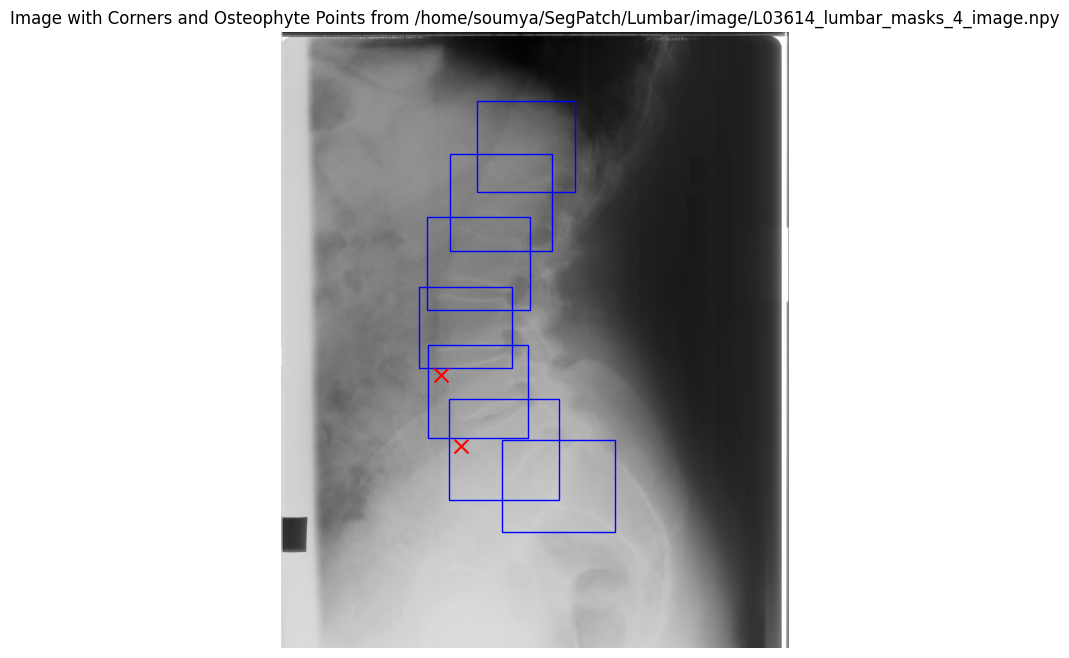

In [27]:
# Define a function to plot corners and osteophyte points
def plot_image_with_annotations(image_path, corners, osteophyte_coords):
    # Load the image using NumPy
    image = np.load(image_path)
    image = np.fliplr(image)

    # Create a plot
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image, cmap='gray')  # Display the image

    # Plot the corners as rectangles
    for corner_set in corners:
        x, y = zip(*corner_set)  # Extract x and y coordinates
        width = max(x) - min(x)
        height = max(y) - min(y)
        rectangle = plt.Rectangle((min(x), min(y)), width, height, fill=False, edgecolor='blue')
        ax.add_patch(rectangle)

    # Overlay the osteophyte points on the image
    for x, y in osteophyte_coords:
        ax.scatter(x, y, color='red', marker='x', s=100)  # Mark osteophyte points with red 'x'

    plt.title(f'Image with Corners and Osteophyte Points from {image_path}')
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Define the data
data = merged_data

count = 0

# Iterate through the data and plot each image with corners and osteophyte points
for item in data:
    image_path = item['File']
    corners = item['Corners']
    osteophyte_coords = item['osteophyte']

    plot_image_with_annotations(image_path, corners, osteophyte_coords)

    count += 1
    if count == 5:
        break

# Showcasing Whether Point in vertex or NOT

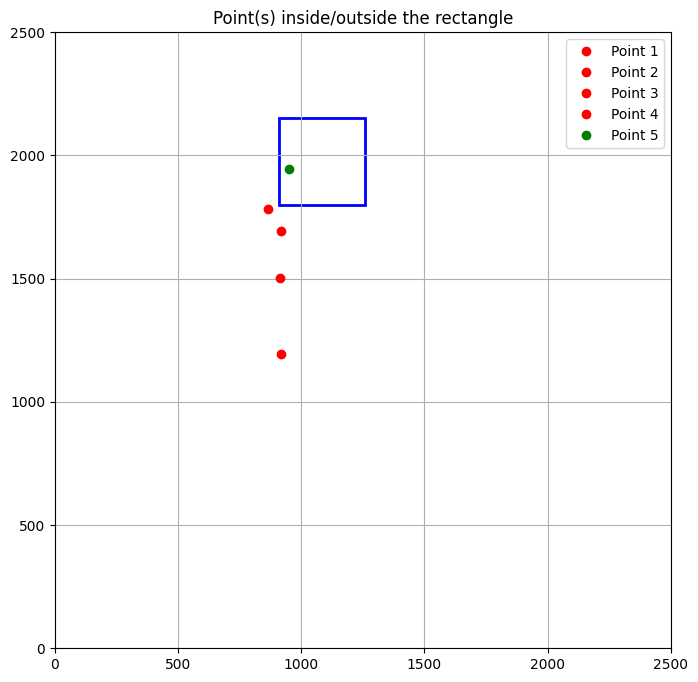

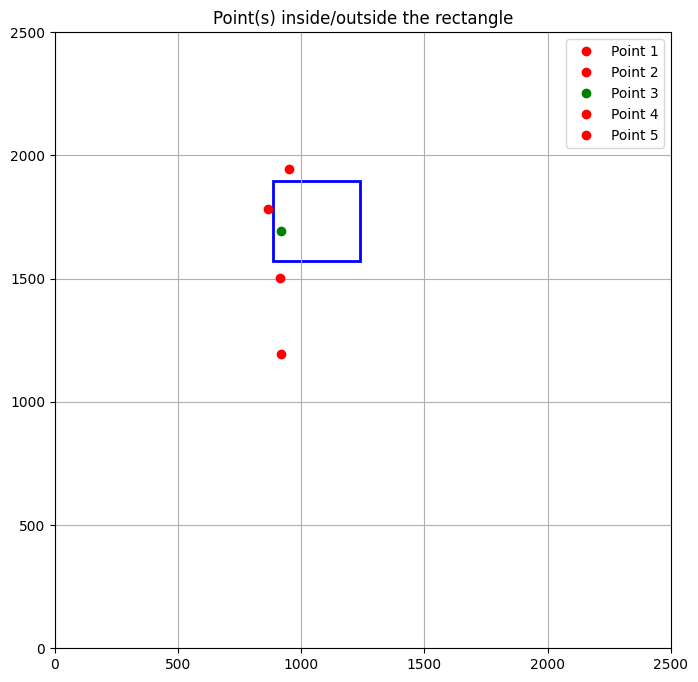

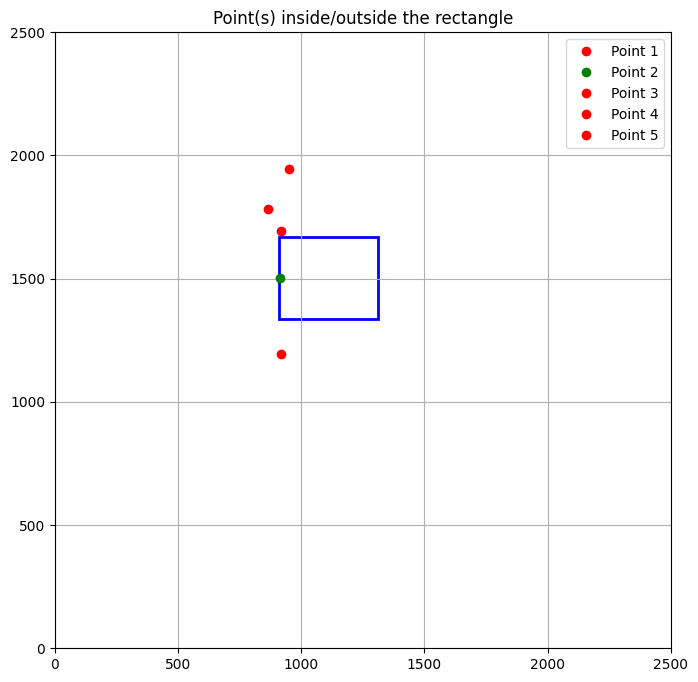

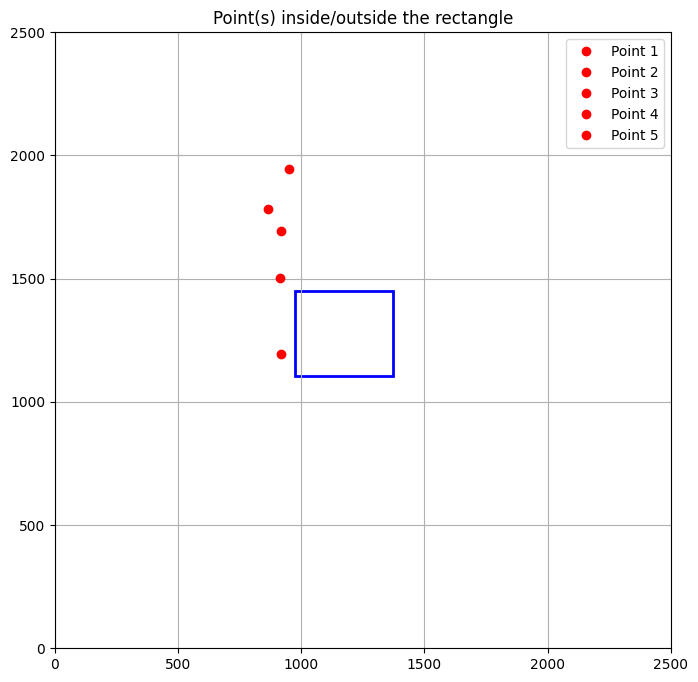

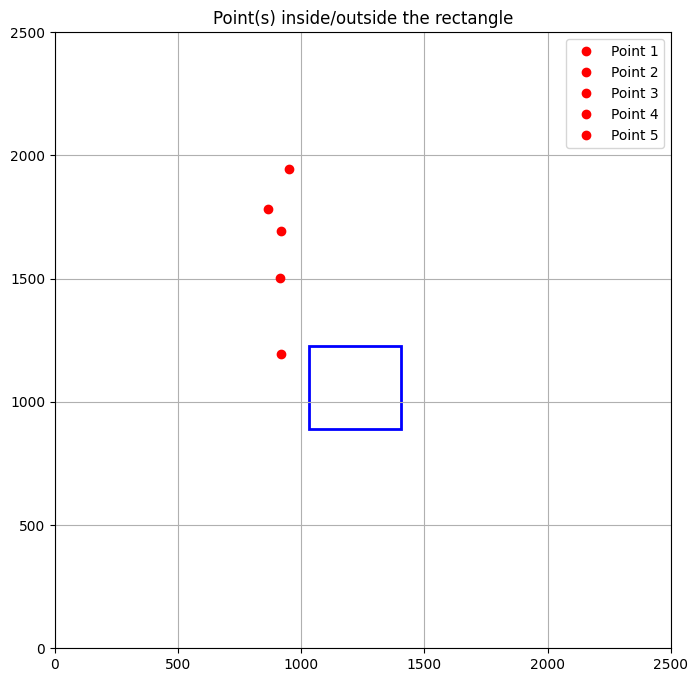

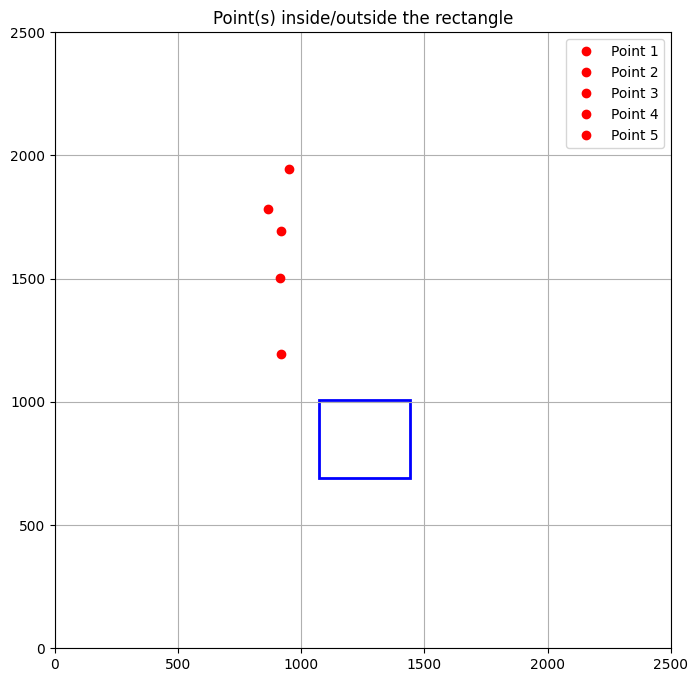

In [28]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

vertices_list = []

for i in range(6):
  vertices_list.append([(int(corner[0]), int(corner[1])) for corner in merged_data[1]['Corners'][i]])

points = [((918, 1196), 'Point 1'), ((915, 1503), 'Point 2'), ((917, 1695), 'Point 3'), ((864, 1784), 'Point 4'), ((951, 1946), 'Point 5')]

# for i in range(6):
#   vertices_list.append([(int(corner[0]), int(corner[1])) for corner in merged_data[1]['Corners'][i]])
#   print(len(vertices_list))

# points = [((918, 1196), 'Point 1'), ((915, 1503), 'Point 2'), ((917, 1695), 'Point 3'), ((864, 1784), 'Point 4'), ((951, 1946), 'Point 5')]

# Iterate over each set of vertices and plot the points
for vertices in vertices_list:
    # Plot the rectangle
    fig, ax = plt.subplots()
    x_min, y_min = min(vertices, key=lambda x: x[0])[0], min(vertices, key=lambda x: x[1])[1]
    x_max, y_max = max(vertices, key=lambda x: x[0])[0], max(vertices, key=lambda x: x[1])[1]
    width = x_max - x_min
    height = y_max - y_min
    rectangle = plt.Rectangle((x_min, y_min), width, height, fill=None, edgecolor='b', linewidth=2)
    ax.add_patch(rectangle)

    # Change the axis limits to a more reasonable range
    ax.set_xlim(0, 2500)
    ax.set_ylim(0, 2500)

    # Set an equal aspect ratio for better visualization
    ax.set_aspect('equal')

    # Adjust the size of the figure
    fig.set_size_inches(8, 8)  # You can adjust the size as needed

    # Test and plot each point
    for point, label in points:
        if x_min <= point[0] <= x_max and y_min <= point[1] <= y_max:
            ax.plot(point[0], point[1], 'go', label=label)
        else:
            ax.plot(point[0], point[1], 'ro', label=label)

    # Show the legend and grid
    plt.title('Point(s) inside/outside the rectangle')
    plt.legend()
    plt.grid()
    plt.show()

# Extracting Data for Positive and Negative Patches

## Visualisation

Osteophyte 1 is within vertebrae 5 of /home/soumya/SegPatch/Lumbar/image/L03496_lumbar_masks_4_image.npy


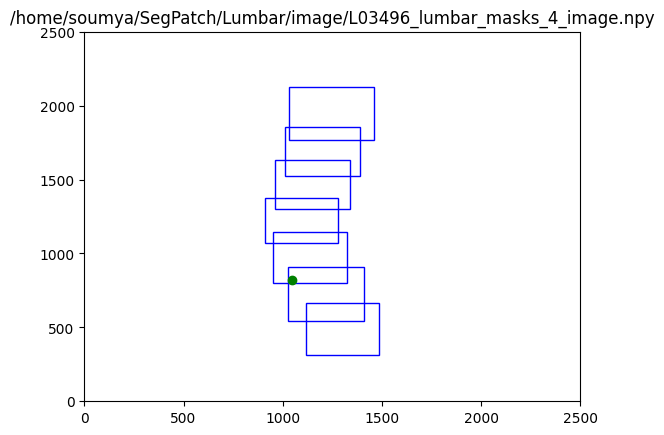

Osteophyte 1 is within vertebrae 5 of /home/soumya/SegPatch/Lumbar/image/L04531_lumbar_masks_4_image.npy
Osteophyte 2 is within vertebrae 2 of /home/soumya/SegPatch/Lumbar/image/L04531_lumbar_masks_4_image.npy
Osteophyte 3 is within vertebrae 1 of /home/soumya/SegPatch/Lumbar/image/L04531_lumbar_masks_4_image.npy


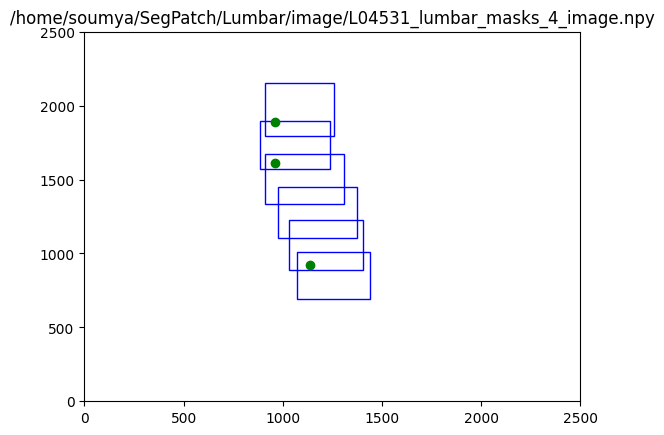

Osteophyte 1 is within vertebrae 6 of /home/soumya/SegPatch/Lumbar/image/L04231_lumbar_masks_4_image.npy
Osteophyte 2 is within vertebrae 5 of /home/soumya/SegPatch/Lumbar/image/L04231_lumbar_masks_4_image.npy
Osteophyte 3 is within vertebrae 5 of /home/soumya/SegPatch/Lumbar/image/L04231_lumbar_masks_4_image.npy
Osteophyte 4 is within vertebrae 4 of /home/soumya/SegPatch/Lumbar/image/L04231_lumbar_masks_4_image.npy
Osteophyte 5 is within vertebrae 3 of /home/soumya/SegPatch/Lumbar/image/L04231_lumbar_masks_4_image.npy
Osteophyte 6 is within vertebrae 2 of /home/soumya/SegPatch/Lumbar/image/L04231_lumbar_masks_4_image.npy
Osteophyte 7 is within vertebrae 2 of /home/soumya/SegPatch/Lumbar/image/L04231_lumbar_masks_4_image.npy


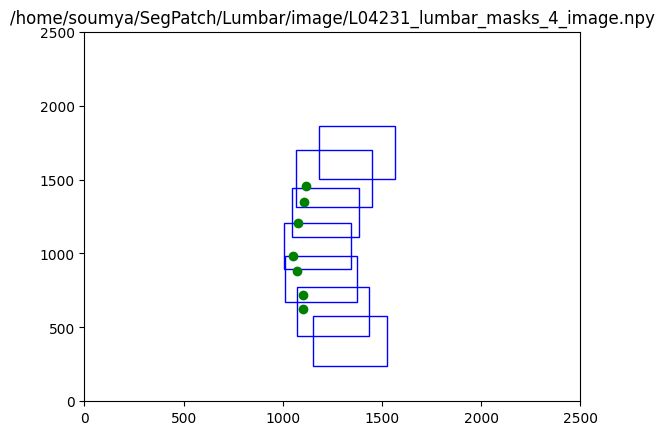

Osteophyte 1 is within vertebrae 4 of /home/soumya/SegPatch/Lumbar/image/L00393_lumbar_masks_4_image.npy
Osteophyte 2 is within vertebrae 4 of /home/soumya/SegPatch/Lumbar/image/L00393_lumbar_masks_4_image.npy
Osteophyte 3 is within vertebrae 2 of /home/soumya/SegPatch/Lumbar/image/L00393_lumbar_masks_4_image.npy


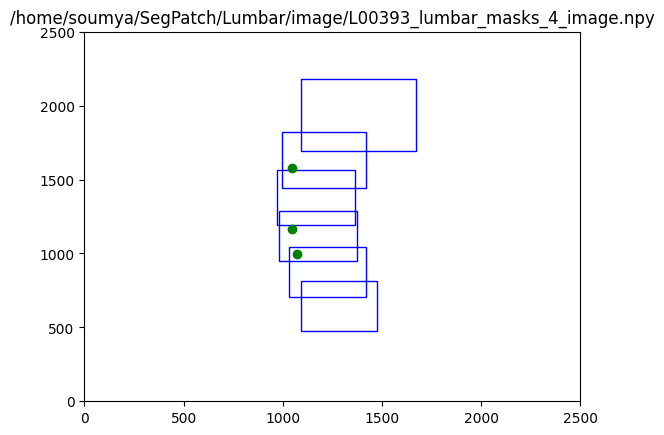

Osteophyte 1 is within vertebrae 3 of /home/soumya/SegPatch/Lumbar/image/L03614_lumbar_masks_4_image.npy
Osteophyte 2 is within vertebrae 2 of /home/soumya/SegPatch/Lumbar/image/L03614_lumbar_masks_4_image.npy


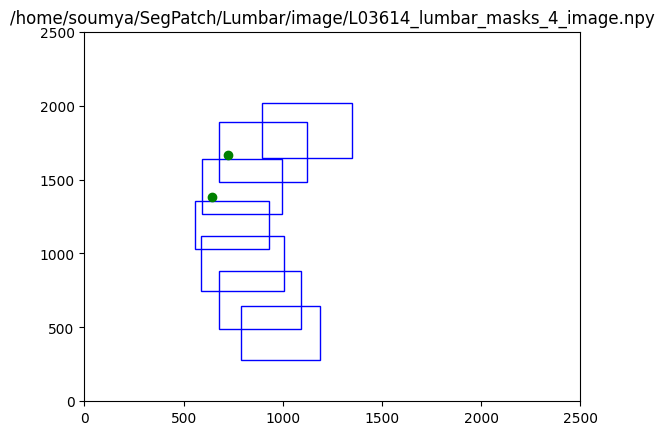

In [30]:
def plot_vertebra(data):

  # Extract data
  file_name = data['File']
  vertebra_corners = data['Corners']
  osteophytes = data['osteophyte']

  # Create plot
  fig, ax = plt.subplots()

  for corners in vertebra_corners:
    # Create figure and axes, add rectangle patch, and set axis limits in one line
    ax.add_patch(plt.Rectangle(corners[0], corners[1][0] - corners[0][0], corners[2][1] - corners[0][1], fill=False, edgecolor='blue'))

  # Check each osteophyte
  ax.set_xlim(0, 2500)
  ax.set_ylim(0, 2500)

  for o_idx, osteophyte in enumerate(osteophytes):

    osteophyte = (int(osteophyte[0]), int(osteophyte[1]))

    # Initialize a flag to check if the osteophyte is within any corner
    is_within_corner = False

    # Check corners
    for c_idx, corners in enumerate(vertebra_corners):

      if corners[0][0] <= osteophyte[0] <= corners[1][0] and \
         corners[0][1] <= osteophyte[1] <= corners[2][1]:

        print(f"Osteophyte {o_idx+1} is within vertebrae {c_idx+1} of {file_name}")
        is_within_corner = True  # Set the flag to True if osteophyte is within a corner
        break

    # Print the result based on the flag
    if is_within_corner:
        # Plot osteophyte point (green) within the loop
        ax.plot(osteophyte[0], osteophyte[1], 'go')
    else:
        # Plot osteophyte point (red) within the loop
        ax.plot(osteophyte[0], osteophyte[1], 'ro')
        print(f" Osteophyte {o_idx+1} is not contained within the bounding box")

  # Set title and show plot
  plt.title(file_name)
  plt.show()

# Plot each vertebra

count = 0

for data in merged_data:
  plot_vertebra(data)
  count += 1
  if count == 5:
    break

## Extraction

In [31]:
import math

def calculate_distance(point1, point2):
    # Calculate the Euclidean distance between two points
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def calculate_angle(point1, point2):
    # Calculate the angle between two points in radians
    dx = point2[0] - point1[0]
    dy = point2[1] - point1[1]
    return math.atan2(dy, dx)

def extraction(data):

    # Extract data
    file_name = data['File']
    vertebra_corners = data['Corners']
    osteophytes = data['osteophyte']

    vertebra_data = {}  # Initialize a dictionary to store data for each vertebra

    for c_idx, corners in enumerate(vertebra_corners):
        osteophytes_within_corner = []  # Initialize a list to store osteophytes within this corner

        for o_idx, osteophyte in enumerate(osteophytes):
            osteophyte = (int(osteophyte[0]), int(osteophyte[1]))

            if corners[0][0] <= osteophyte[0] <= corners[1][0] and \
               corners[0][1] <= osteophyte[1] <= corners[2][1]:
                osteophytes_within_corner.append(osteophyte)  # Append the osteophyte coordinates

        if osteophytes_within_corner:
            osteophyte_data = {}  # Initialize a dictionary to store data for each osteophyte

            # Calculate centroid and store vertebrae coordinates
            vertebra_coords = [(corners[0][0], corners[0][1]),
                               (corners[1][0], corners[0][1]),
                               (corners[0][0], corners[2][1]),
                               (corners[1][0], corners[2][1])]
            centroid_x = sum(coord[0] for coord in vertebra_coords) / len(vertebra_coords)
            centroid_y = sum(coord[1] for coord in vertebra_coords) / len(vertebra_coords)

            for osteophyte in osteophytes_within_corner:
                distance = calculate_distance(osteophyte, (centroid_x, centroid_y))
                angle = calculate_angle(osteophyte, (centroid_x, centroid_y))

                osteophyte_data[osteophyte] = {
                    'Distance': distance,
                    'Angle (radians)': angle
                }

            vertebra_data[c_idx + 1] = {
                'File': file_name,  # Add filename to the data
                'Centroid': (centroid_x, centroid_y),
                'Vertebrae Coordinates': vertebra_coords,
                'Osteophytes': osteophytes_within_corner,
                'Osteophyte Data': osteophyte_data
            }
        else:
            vertebra_coords = [(corners[0][0], corners[0][1]),
                               (corners[1][0], corners[0][1]),
                               (corners[0][0], corners[2][1]),
                               (corners[1][0], corners[2][1])]

            vertebra_data[c_idx + 1] = {
                'File': file_name,  # Add filename to the data
                'Centroid': None,
                'Vertebrae Coordinates': vertebra_coords,
                'Osteophytes': [],
                'Osteophyte Data': {}
            }

    return vertebra_data

In [32]:
# Process data and get results
for image_idx, data in enumerate(merged_data, start=1):
    result = extraction(data)
    file_name = data['File']

    print(f"In image {image_idx}:")
    print(f"  Image Filename: {file_name}")
    print('------------------------------')

    for vertebra_num, vertebra_info in result.items():
        osteophytes = vertebra_info['Osteophytes']
        osteophyte_data = vertebra_info['Osteophyte Data']
        centroid = vertebra_info['Centroid']
        vertebra_coords = vertebra_info['Vertebrae Coordinates']

        print(f"  Vertebra {vertebra_num} has {len(osteophytes)} osteophyte(s):")

        for osteophyte, data in osteophyte_data.items():
            angle = data['Angle (radians)']
            distance = data['Distance']
            print(f"    Osteophyte {osteophyte} with angle {angle:.2f} and distance {distance:.2f}")

        print(f"  These are the vertebrae coordinates and centroid coordinates:")
        print(f"    Vertebrae Coordinates: {vertebra_coords}")
        print(f"    Centroid: {centroid}")


In image 1:
  Image Filename: /home/soumya/SegPatch/Lumbar/image/L03496_lumbar_masks_4_image.npy
------------------------------
  Vertebra 1 has 0 osteophyte(s):
  These are the vertebrae coordinates and centroid coordinates:
    Vertebrae Coordinates: [(1034, 1765), (1459, 1765), (1034, 2125), (1459, 2125)]
    Centroid: None
  Vertebra 2 has 0 osteophyte(s):
  These are the vertebrae coordinates and centroid coordinates:
    Vertebrae Coordinates: [(1013, 1522), (1388, 1522), (1013, 1856), (1388, 1856)]
    Centroid: None
  Vertebra 3 has 0 osteophyte(s):
  These are the vertebrae coordinates and centroid coordinates:
    Vertebrae Coordinates: [(959, 1300), (1339, 1300), (959, 1631), (1339, 1631)]
    Centroid: None
  Vertebra 4 has 0 osteophyte(s):
  These are the vertebrae coordinates and centroid coordinates:
    Vertebrae Coordinates: [(913, 1073), (1281, 1073), (913, 1377), (1281, 1377)]
    Centroid: None
  Vertebra 5 has 1 osteophyte(s):
    Osteophyte (1048, 821) with angle 

## Dummy Viz

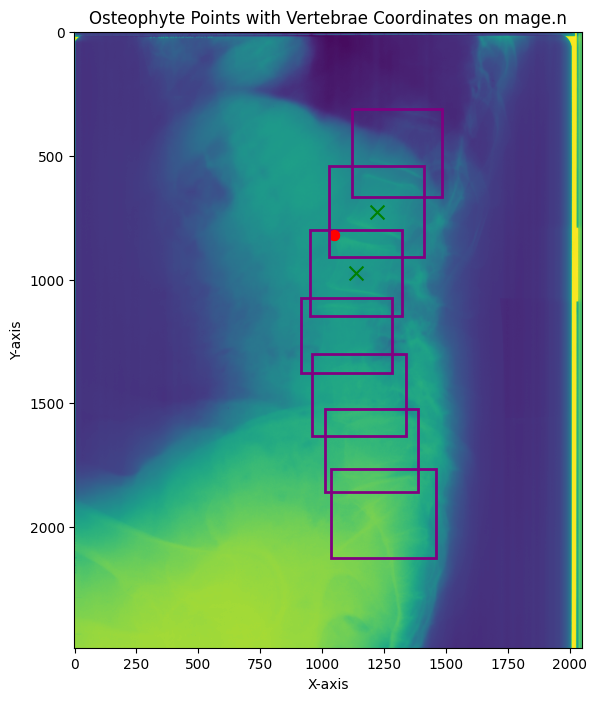

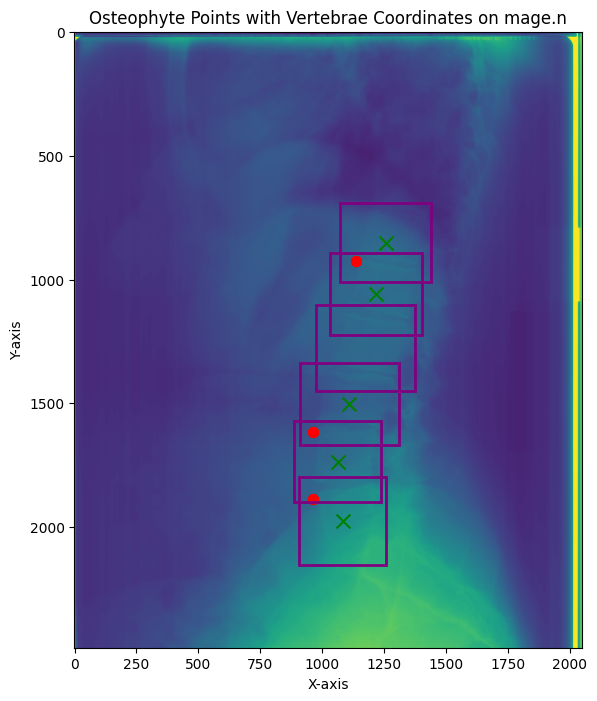

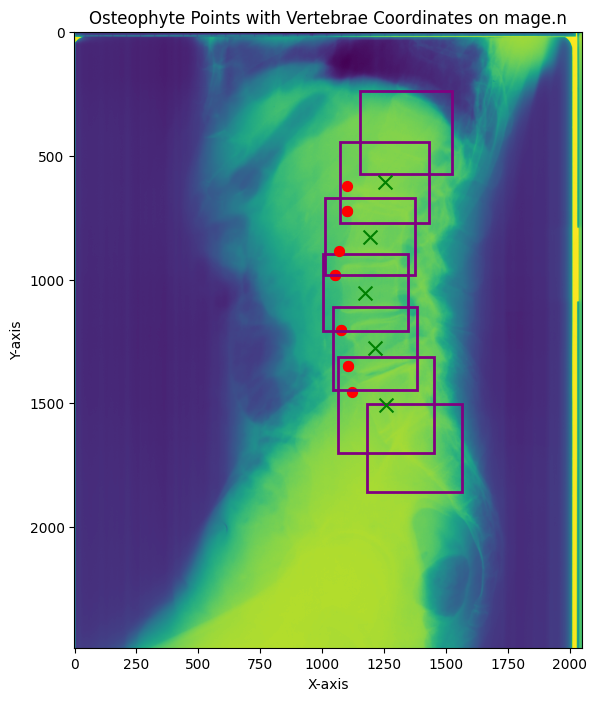

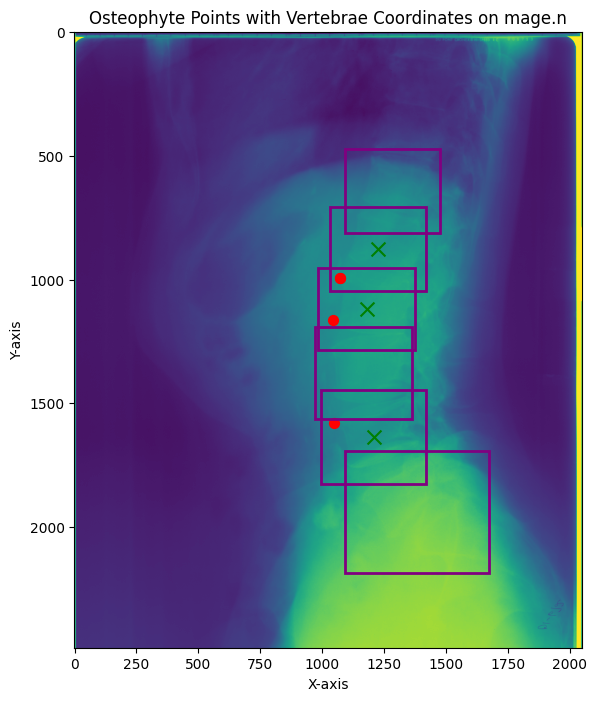

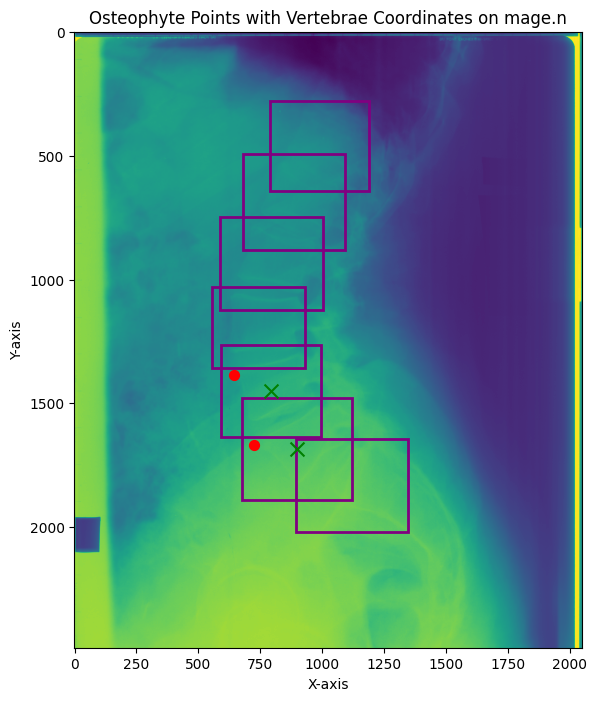

In [34]:
import matplotlib.patches as patches

count = 0

# Process data and get results
for image_idx, data in enumerate(merged_data, start=1):
    result = extraction(data)
    file_name = data['File']

    # Load the image
    image = np.load(file_name)
    image = np.fliplr(image)

    # Create a Matplotlib figure and axis for plotting
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display the image
    ax.imshow(image)

    # Initialize lists to store centroids
    centroid_x_list = []
    centroid_y_list = []

    # Iterate over vertebrae data
    for vertebra_num, vertebra_info in result.items():
        osteophytes = vertebra_info['Osteophytes']
        centroid = vertebra_info['Centroid']
        vertebra_coords = vertebra_info['Vertebrae Coordinates']

        # Iterate over osteophyte coordinates
        for osteophyte in osteophytes:
            # Plot osteophyte points as red dots
            ax.scatter(osteophyte[0], osteophyte[1], c='red', marker='o', s=50)

        # Plot vertebrae coordinates with minimum x, y weighted dimensions and height
        min_x = min(vertebra_coords, key=lambda x: x[0])[0]
        min_y = min(vertebra_coords, key=lambda x: x[1])[1]
        max_x = max(vertebra_coords, key=lambda x: x[0])[0]
        max_y = max(vertebra_coords, key=lambda x: x[1])[1]
        height = max_y - min_y

        # Plot the weighted dimensions as a purple rectangle
        rect = patches.Rectangle((min_x, min_y), max_x - min_x, height, linewidth=2, edgecolor='purple', facecolor='none')
        ax.add_patch(rect)

        # Store centroid coordinates
        if centroid:
            centroid_x, centroid_y = centroid
            centroid_x_list.append(centroid_x)
            centroid_y_list.append(centroid_y)

        # # Print centroid and vertebra coordinates
        # print(f"In image {image_idx}, Vertebra {vertebra_num}:")
        # print(f"  Centroid: {centroid}")
        # print(f"  Minimum X: {min_x}, Minimum Y: {min_y}, Height: {height}")

    # Plot centroids as green crosses
    ax.scatter(centroid_x_list, centroid_y_list, c='green', marker='x', s=100)

    # Set labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title(f'Osteophyte Points with Vertebrae Coordinates on {file_name[58:64]}')

    # Show the plot
    plt.show()

    count += 1

    if count == 5:
        break

# Generating Patches

## Generating ALL Patches

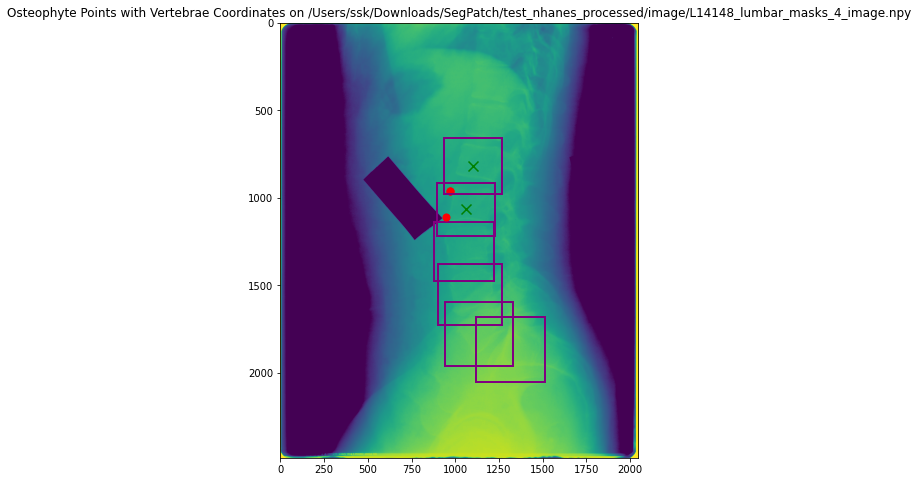

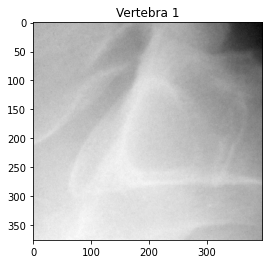

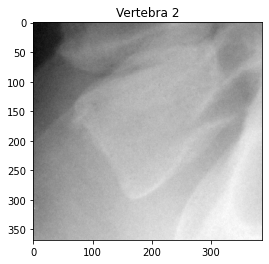

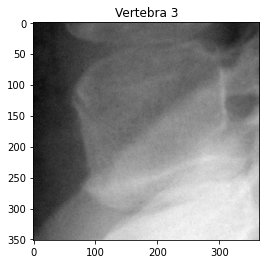

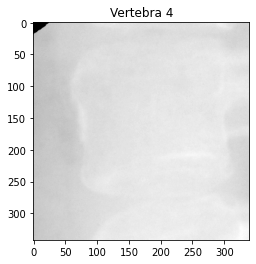

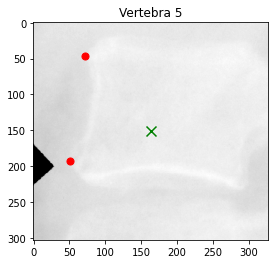

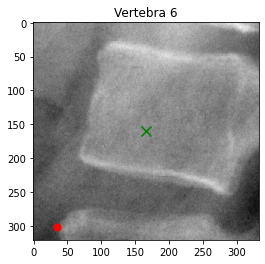

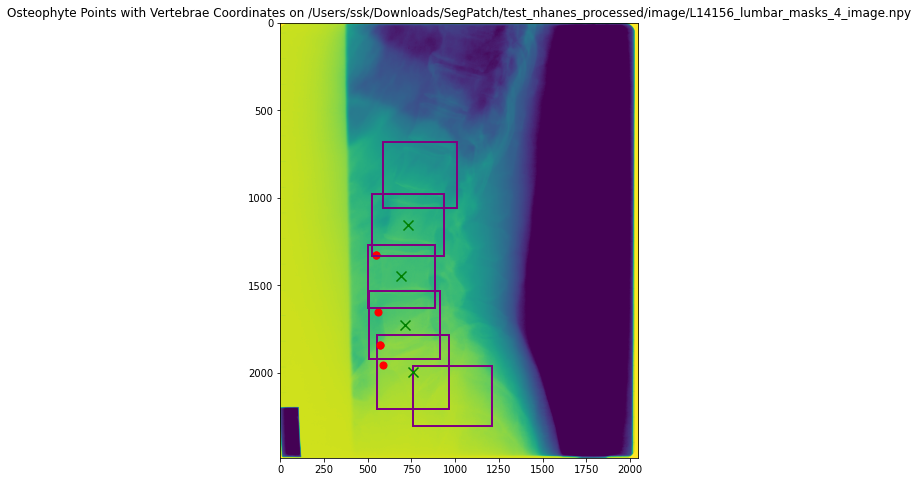

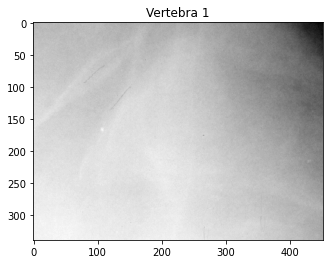

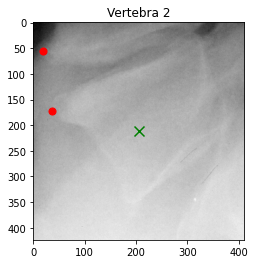

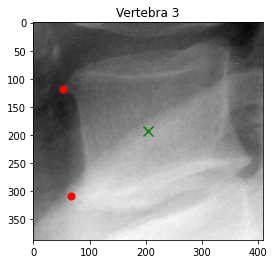

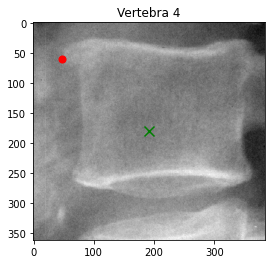

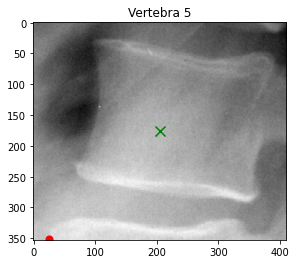

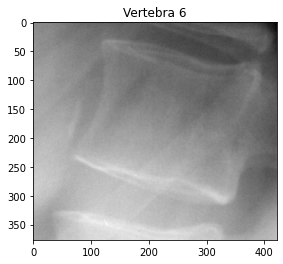

In [46]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define a function to crop and plot an image patch for a single vertebra
# def crop_and_plot_single_vertebra(original_image, vertebra_coords, vertebra_num, osteophytes, centroid):
#     x_coords = [c[0] for c in vertebra_coords]
#     y_coords = [c[1] for c in vertebra_coords]

#     x_min = min(x_coords)
#     x_max = max(x_coords)
#     y_min = min(y_coords)
#     y_max = max(y_coords)

#     cropped_image = original_image[y_min:y_max, x_min:x_max]

#     # Plot the cropped image for the single vertebra
#     plt.figure(figsize=(6, 4))
#     plt.imshow(cropped_image, cmap='gray')
#     plt.title(f'Vertebra {vertebra_num}')

#     # Plot osteophyte points as red dots
#     osteophyte_x = [o[0] - x_min for o in osteophytes]
#     osteophyte_y = [o[1] - y_min for o in osteophytes]
#     plt.scatter(osteophyte_x, osteophyte_y, c='red', marker='o', s=50)

#     # Plot centroid as a green cross
#     if centroid:
#         centroid_x = centroid[0] - x_min
#         centroid_y = centroid[1] - y_min
#         plt.scatter(centroid_x, centroid_y, c='green', marker='x', s=100)

#     plt.show()

# # Process data and plot original images with patches
# for data in merged_data:
#     file_name = data['File']
#     image = np.load(file_name)  # Load the image using NumPy
#     image = np.fliplr(image)

#     result = extraction(data)

#     # Process data and get results
# for image_idx, data in enumerate(merged_data, start=1):
#     result = extraction(data)
#     file_name = data['File']

#     # Load the image
#     image = np.load(file_name)
#     image = np.fliplr(image)

#     # Create a Matplotlib figure and axis for plotting
#     fig, ax = plt.subplots(figsize=(8, 8))

#     # Display the image
#     ax.imshow(image)

#     # Initialize lists to store centroids
#     centroid_x_list = []
#     centroid_y_list = []

#     # Iterate over vertebrae data
#     for vertebra_num, vertebra_info in result.items():
#         osteophytes = vertebra_info['Osteophytes']
#         centroid = vertebra_info['Centroid']
#         vertebra_coords = vertebra_info['Vertebrae Coordinates']

#         # Iterate over osteophyte coordinates
#         for osteophyte in osteophytes:
#             # Plot osteophyte points as red dots
#             ax.scatter(osteophyte[0], osteophyte[1], c='red', marker='o', s=50)

#         # Plot vertebrae coordinates with minimum x, y weighted dimensions and height
#         min_x = min(vertebra_coords, key=lambda x: x[0])[0]
#         min_y = min(vertebra_coords, key=lambda x: x[1])[1]
#         max_x = max(vertebra_coords, key=lambda x: x[0])[0]
#         max_y = max(vertebra_coords, key=lambda x: x[1])[1]
#         height = max_y - min_y

#         # Plot the weighted dimensions as a purple rectangle
#         rect = patches.Rectangle((min_x, min_y), max_x - min_x, height, linewidth=2, edgecolor='purple', facecolor='none')
#         ax.add_patch(rect)

#         # Store centroid coordinates
#         if centroid:
#             centroid_x, centroid_y = centroid
#             centroid_x_list.append(centroid_x)
#             centroid_y_list.append(centroid_y)

#     # Plot centroids as green crosses
#     ax.scatter(centroid_x_list, centroid_y_list, c='green', marker='x', s=100)

#     # Set labels and title
#     # ax.set_xlabel('X-axis')
#     # ax.set_ylabel('Y-axis')
#     ax.set_title(f'Osteophyte Points with Vertebrae Coordinates on {file_name}')

#     # Show the plot
#     plt.show()

#     for vertebra_num, vertebra_info in result.items():
#         vertebra_coords = vertebra_info['Vertebrae Coordinates']
#         osteophytes = vertebra_info['Osteophytes']
#         centroid = vertebra_info['Centroid']

#         if vertebra_coords:
#             crop_and_plot_single_vertebra(image, vertebra_coords, vertebra_num, osteophytes, centroid)

## Generating the Labels

In [47]:
# # Initialize two lists to store vertebrae with and without osteophytes
# vertebrae_with_osteophytes = []
# vertebrae_without_osteophytes = []

# # Process data and get results
# for image_idx, data in enumerate(merged_data, start=1):
#     result = extraction(data)
#     file_name = data['File']

#     # Initialize lists to store vertebrae numbers with and without osteophytes for this file
#     with_osteophytes = []
#     without_osteophytes = []

#     for vertebra_num, vertebra_info in result.items():
#         osteophytes = vertebra_info['Osteophytes']

#         if osteophytes:
#             with_osteophytes.append(vertebra_num)
#         else:
#             without_osteophytes.append(vertebra_num)

#     # Add file-specific information to the respective lists
#     if with_osteophytes:
#         vertebrae_with_osteophytes.append((file_name, with_osteophytes))
#     if without_osteophytes:
#         vertebrae_without_osteophytes.append((file_name, without_osteophytes))

# # Print the results
# for file_idx, (file_name, with_osteophytes) in enumerate(vertebrae_with_osteophytes, start=1):
#     print(f"In file {file_idx}:")
#     print(f"  Vertebrae {', '.join(map(str, with_osteophytes))} have osteophytes")

# for file_idx, (file_name, without_osteophytes) in enumerate(vertebrae_without_osteophytes, start=1):
#     print(f"In file {file_idx}:")
#     print(f"  Vertebrae {', '.join(map(str, without_osteophytes))} do not have osteophytes")

In file 1:
  Vertebrae 5, 6 have osteophytes
In file 2:
  Vertebrae 2, 3, 4, 5 have osteophytes
In file 1:
  Vertebrae 1, 2, 3, 4 do not have osteophytes
In file 2:
  Vertebrae 1, 6 do not have osteophytes


## Generating Positive Patches

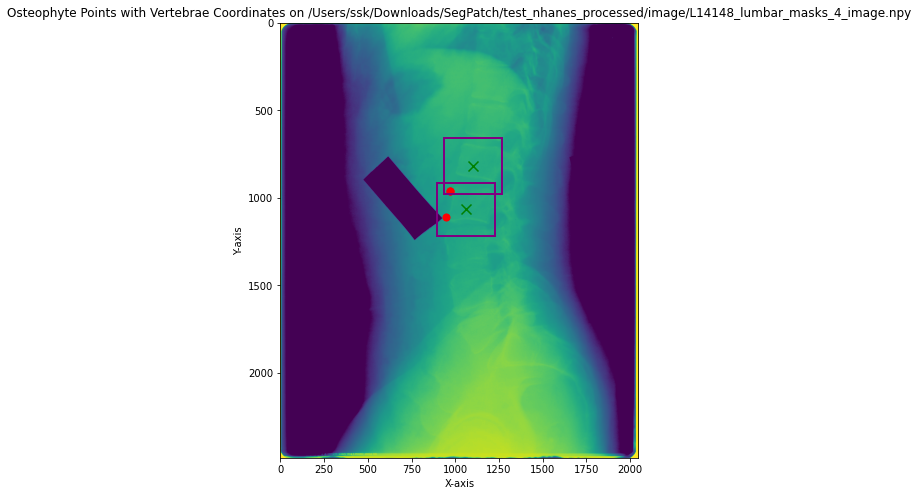

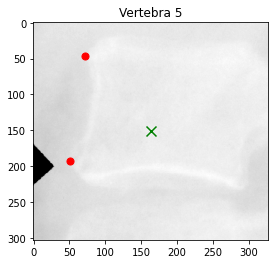

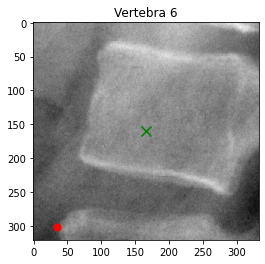

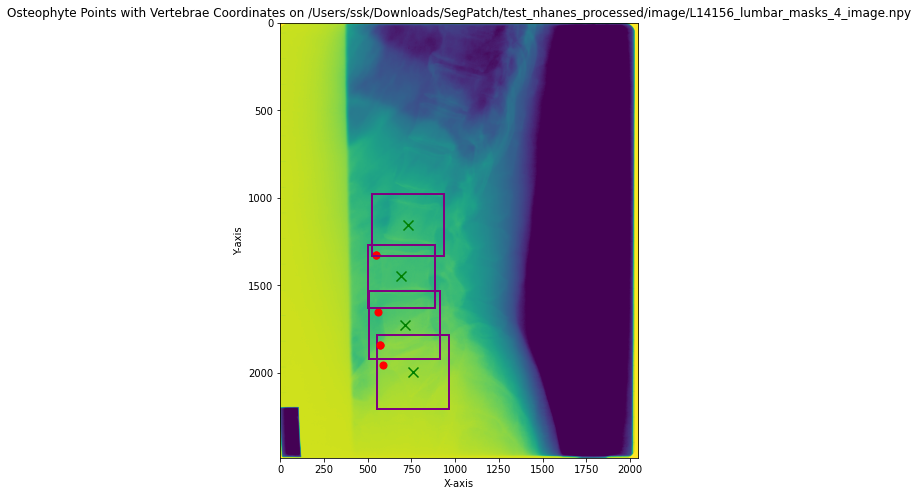

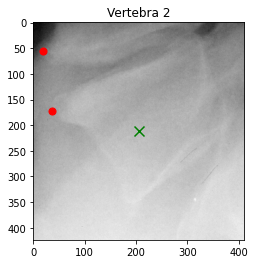

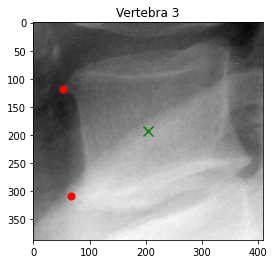

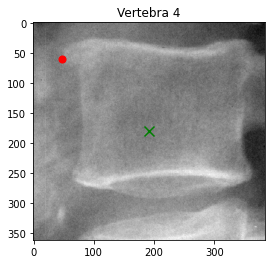

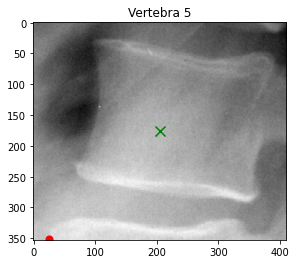

In [48]:
# # Process data and plot original images with patches
# for data in merged_data:
#     file_name = data['File']
#     image = np.load(file_name)  # Load the image using NumPy
#     image = np.fliplr(image)

#     result = extraction(data)

#     # Create a Matplotlib figure and axis for plotting
#     fig, ax = plt.subplots(figsize=(8, 8))

#     # Display the image
#     ax.imshow(image)

#     # Initialize lists to store centroids
#     centroid_x_list = []
#     centroid_y_list = []

#     # Initialize a list to track vertebrae with osteophytes
#     vertebrae_with_osteophytes = []

#     # Iterate over vertebrae data
#     for vertebra_num, vertebra_info in result.items():
#         osteophytes = vertebra_info['Osteophytes']
#         centroid = vertebra_info['Centroid']
#         vertebra_coords = vertebra_info['Vertebrae Coordinates']

#         # Check if there are osteophytes before generating the patch
#         if osteophytes:
#             # Append the vertebra number to the list of vertebrae with osteophytes
#             vertebrae_with_osteophytes.append(vertebra_num)

#             # Iterate over osteophyte coordinates
#             for osteophyte in osteophytes:
#                 # Plot osteophyte points as red dots
#                 ax.scatter(osteophyte[0], osteophyte[1], c='red', marker='o', s=50)

#             # Plot vertebrae coordinates with minimum x, y weighted dimensions and height
#             min_x = min(vertebra_coords, key=lambda x: x[0])[0]
#             min_y = min(vertebra_coords, key=lambda x: x[1])[1]
#             max_x = max(vertebra_coords, key=lambda x: x[0])[0]
#             max_y = max(vertebra_coords, key=lambda x: x[1])[1]
#             height = max_y - min_y

#             # Plot the weighted dimensions as a purple rectangle
#             rect = patches.Rectangle((min_x, min_y), max_x - min_x, height, linewidth=2, edgecolor='purple', facecolor='none')
#             ax.add_patch(rect)

#             # Store centroid coordinates
#             if centroid:
#                 centroid_x, centroid_y = centroid
#                 centroid_x_list.append(centroid_x)
#                 centroid_y_list.append(centroid_y)

#     # Plot centroids as green crosses
#     ax.scatter(centroid_x_list, centroid_y_list, c='green', marker='x', s=100)

#     # Set labels and title
#     ax.set_xlabel('X-axis')
#     ax.set_ylabel('Y-axis')
#     ax.set_title(f'Osteophyte Points with Vertebrae Coordinates on {file_name}')

#     # Show the plot
#     plt.show()

#     # Generate patches for vertebrae with osteophytes only
#     for vertebra_num in vertebrae_with_osteophytes:
#         vertebra_info = result[vertebra_num]
#         vertebra_coords = vertebra_info['Vertebrae Coordinates']
#         osteophytes = vertebra_info['Osteophytes']
#         centroid = vertebra_info['Centroid']

#         crop_and_plot_single_vertebra(image, vertebra_coords, vertebra_num, osteophytes, centroid)


## Generating Absent Patches

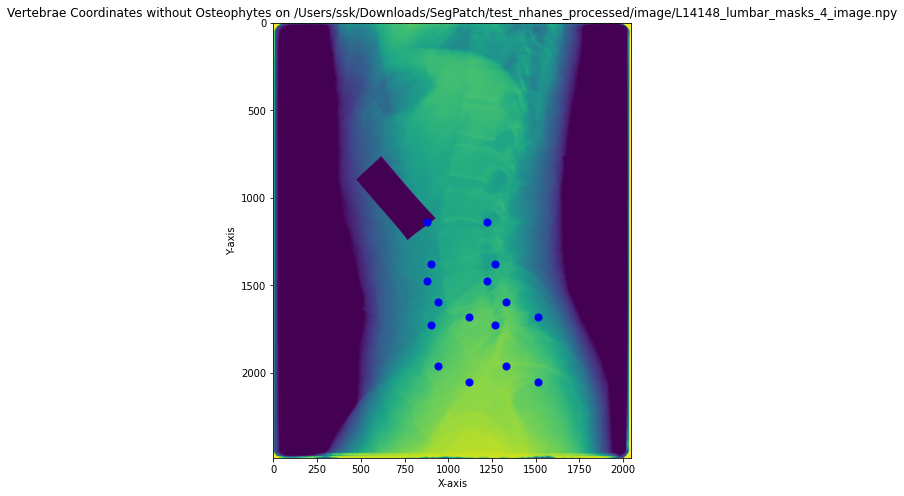

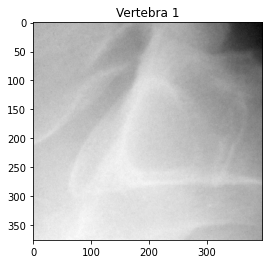

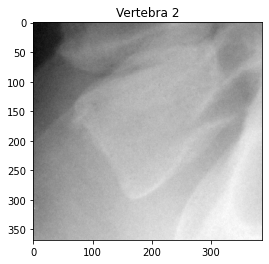

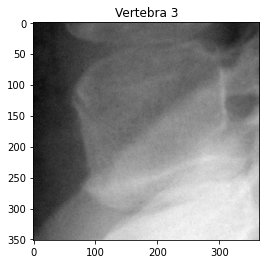

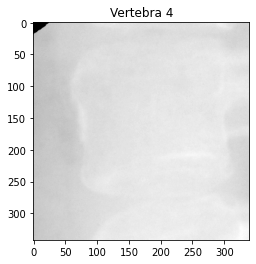

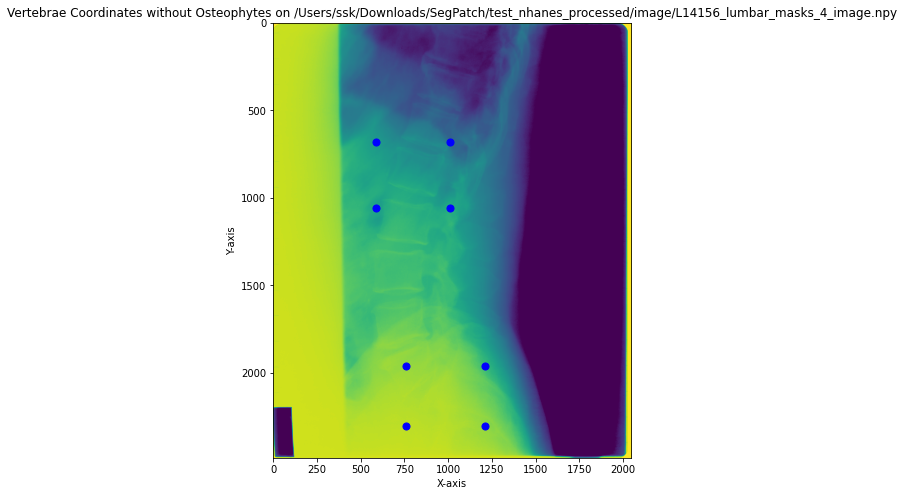

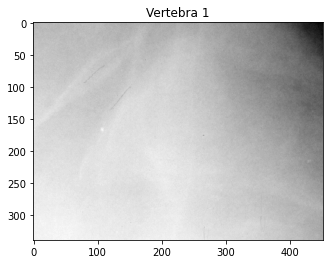

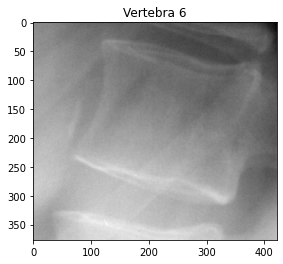

In [49]:
# # Process data and plot original images with patches for vertebrae without osteophytes
# for data in merged_data:
#     file_name = data['File']
#     image = np.load(file_name)  # Load the image using NumPy
#     image = np.fliplr(image)

#     result = extraction(data)

#     # Create a Matplotlib figure and axis for plotting
#     fig, ax = plt.subplots(figsize=(8, 8))

#     # Display the image
#     ax.imshow(image)

#     # Initialize lists to store centroids
#     centroid_x_list = []
#     centroid_y_list = []

#     # Initialize a list to track vertebrae without osteophytes
#     vertebrae_without_osteophytes = []

#     # Iterate over vertebrae data
#     for vertebra_num, vertebra_info in result.items():
#         osteophytes = vertebra_info['Osteophytes']
#         centroid = vertebra_info['Centroid']
#         vertebra_coords = vertebra_info['Vertebrae Coordinates']

#         # Check if there are no osteophytes before generating the patch
#         if not osteophytes:
#             # Append the vertebra number to the list of vertebrae without osteophytes
#             vertebrae_without_osteophytes.append(vertebra_num)

#             # Iterate over vertebrae coordinates
#             for vert_coord in vertebra_coords:
#                 # Plot vertebrae coordinates as blue dots
#                 ax.scatter(vert_coord[0], vert_coord[1], c='blue', marker='o', s=50)

#             # Store centroid coordinates
#             if centroid:
#                 centroid_x, centroid_y = centroid
#                 centroid_x_list.append(centroid_x)
#                 centroid_y_list.append(centroid_y)

#     # Plot centroids as green crosses
#     ax.scatter(centroid_x_list, centroid_y_list, c='green', marker='x', s=100)

#     # Set labels and title
#     ax.set_xlabel('X-axis')
#     ax.set_ylabel('Y-axis')
#     ax.set_title(f'Vertebrae Coordinates without Osteophytes on {file_name}')

#     # Show the plot
#     plt.show()

#     # Generate patches for vertebrae without osteophytes only
#     for vertebra_num in vertebrae_without_osteophytes:
#         vertebra_info = result[vertebra_num]
#         vertebra_coords = vertebra_info['Vertebrae Coordinates']
#         centroid = vertebra_info['Centroid']

#         crop_and_plot_single_vertebra(image, vertebra_coords, vertebra_num, [], centroid)

# Saving the Patches

Preparing the Dataset

## Absent Patches

In [50]:
# import os

# # Define a directory to save the patches
# save_directory = "/content/saved_patches_absent/"

# # Create the save directory if it doesn't exist
# if not os.path.exists(save_directory):
#     os.makedirs(save_directory)

# # Process data and save patches for vertebrae without osteophytes
# for data in merged_data:
#     file_name = data['File']
#     image = np.load(file_name)  # Load the image using NumPy
#     image = np.fliplr(image)

#     result = extraction(data)

#     # Initialize a list to track vertebrae without osteophytes
#     vertebrae_without_osteophytes = []

#     # Iterate over vertebrae data
#     for vertebra_num, vertebra_info in result.items():
#         osteophytes = vertebra_info['Osteophytes']
#         vertebra_coords = vertebra_info['Vertebrae Coordinates']

#         # Check if there are no osteophytes before saving the patch
#         if not osteophytes:
#             # Append the vertebra number to the list of vertebrae without osteophytes
#             vertebrae_without_osteophytes.append(vertebra_num)

#             # Crop the patch from the original image
#             x_coords = [c[0] for c in vertebra_coords]
#             y_coords = [c[1] for c in vertebra_coords]
#             x_min = min(x_coords)
#             x_max = max(x_coords)
#             y_min = min(y_coords)
#             y_max = max(y_coords)
#             cropped_patch = image[y_min:y_max, x_min:x_max]

#             # Define the filename for the numpy file
#             save_filename = f"{os.path.splitext(os.path.basename(file_name))[0]}_{vertebra_num}.npy"

#             # Define the full path to save the file
#             save_path = os.path.join(save_directory, save_filename)

#             # Save the patch as a numpy file
#             np.save(save_path, cropped_patch)

#             print(f"Saved patch for Vertebra {vertebra_num} as {save_path}")

# # Print a message indicating where the patches were saved
# print(f"Patches have been saved in the directory: {save_directory}")

OSError: [Errno 30] Read-only file system: '/content'

## Present Patches

In [ ]:
# import os

# # Define a directory to save the patches
# save_directory = "/content/saved_patches-present/"

# # Create the save directory if it doesn't exist
# if not os.path.exists(save_directory):
#     os.makedirs(save_directory)

# # Process data and save patches for vertebrae with osteophytes
# for data in merged_data:
#     file_name = data['File']
#     image = np.load(file_name)  # Load the image using NumPy
#     image = np.fliplr(image)

#     result = extraction(data)

#     # Initialize a list to track vertebrae with osteophytes
#     vertebrae_with_osteophytes = []

#     # Iterate over vertebrae data
#     for vertebra_num, vertebra_info in result.items():
#         osteophytes = vertebra_info['Osteophytes']
#         vertebra_coords = vertebra_info['Vertebrae Coordinates']

#         # Check if there are osteophytes before saving the patch
#         if osteophytes:
#             # Append the vertebra number to the list of vertebrae with osteophytes
#             vertebrae_with_osteophytes.append(vertebra_num)

#             # Crop the patch from the original image
#             x_coords = [c[0] for c in vertebra_coords]
#             y_coords = [c[1] for c in vertebra_coords]
#             x_min = min(x_coords)
#             x_max = max(x_coords)
#             y_min = min(y_coords)
#             y_max = max(y_coords)
#             cropped_patch = image[y_min:y_max, x_min:x_max]

#             # Define the filename for the numpy file
#             save_filename = f"{os.path.splitext(os.path.basename(file_name))[0]}_{vertebra_num}.npy"

#             # Define the full path to save the file
#             save_path = os.path.join(save_directory, save_filename)

#             # Save the patch as a numpy file
#             np.save(save_path, cropped_patch)

#             print(f"Saved patch for Vertebra {vertebra_num} as {save_path}")

# # Print a message indicating where the patches were saved
# print(f"Patches for vertebrae with osteophytes have been saved in the directory: {save_directory}")


Saved patch for Vertebra 1 as /content/saved_patches-present/L00327_lumbar_masks_4_image_1.npy
Saved patch for Vertebra 2 as /content/saved_patches-present/L00327_lumbar_masks_4_image_2.npy
Saved patch for Vertebra 3 as /content/saved_patches-present/L00327_lumbar_masks_4_image_3.npy
Saved patch for Vertebra 4 as /content/saved_patches-present/L00327_lumbar_masks_4_image_4.npy
Saved patch for Vertebra 2 as /content/saved_patches-present/L00329_lumbar_masks_4_image_2.npy
Saved patch for Vertebra 3 as /content/saved_patches-present/L00329_lumbar_masks_4_image_3.npy
Saved patch for Vertebra 4 as /content/saved_patches-present/L00329_lumbar_masks_4_image_4.npy
Patches for vertebrae with osteophytes have been saved in the directory: /content/saved_patches-present/


# Building Masks For Segmentation

## Visualisation

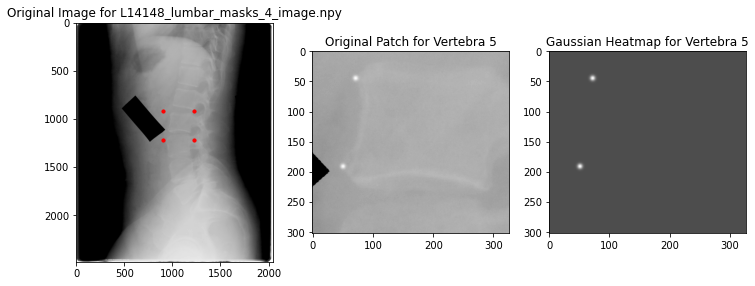

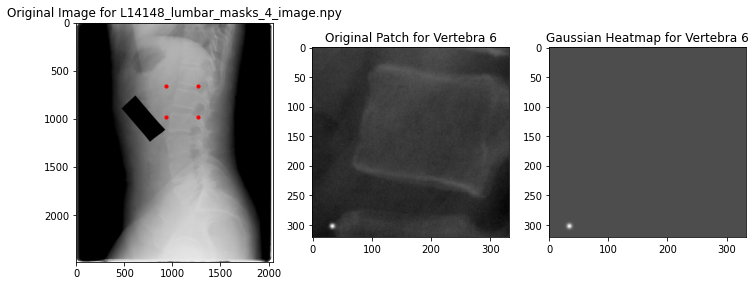

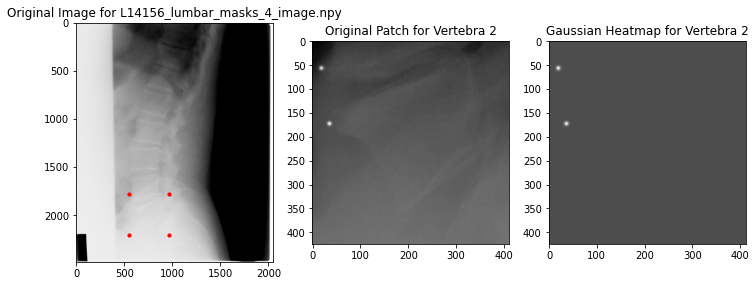

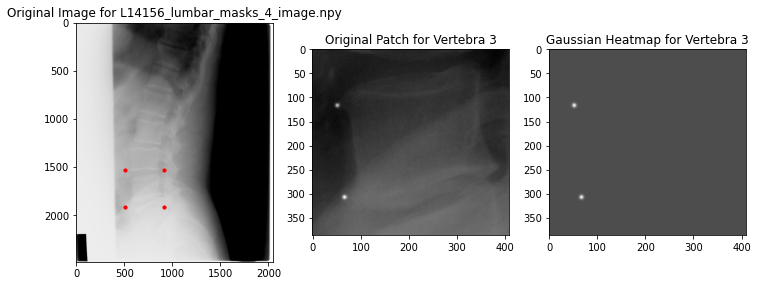

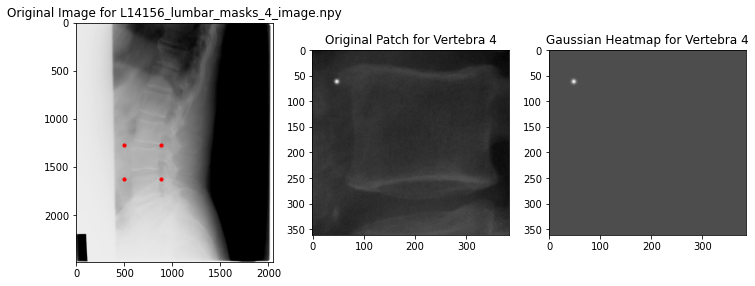

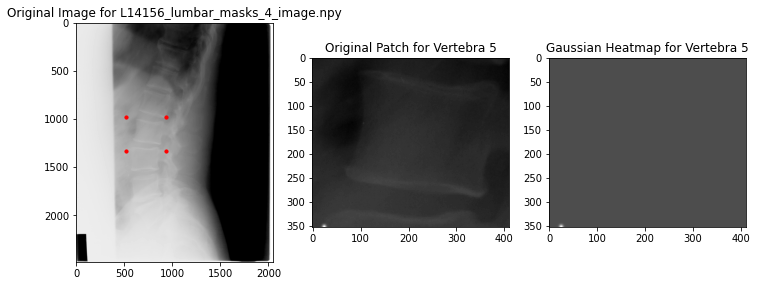

In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.ndimage import gaussian_filter


# # Process data and create Gaussian heatmaps for osteophyte points file-wise
# for data in merged_data:
#     file_name = data['File']
#     image = np.load(file_name)  # Load the image using NumPy
#     image = np.fliplr(image)

#     result = extraction(data)

#     # Initialize a list to track vertebrae with osteophytes
#     vertebrae_with_osteophytes = []

#     # Iterate over vertebrae data
#     for vertebra_num, vertebra_info in result.items():
#         osteophytes = vertebra_info['Osteophytes']
#         vertebra_coords = vertebra_info['Vertebrae Coordinates']

#         # Check if there are osteophytes before processing
#         if osteophytes:
#             # Append the vertebra number to the list of vertebrae with osteophytes
#             vertebrae_with_osteophytes.append(vertebra_num)

#             # Crop the patch from the original image
#             x_coords = [c[0] for c in vertebra_coords]
#             y_coords = [c[1] for c in vertebra_coords]
#             x_min = min(x_coords)
#             x_max = max(x_coords)
#             y_min = min(y_coords)
#             y_max = max(y_coords)
#             cropped_patch = image[y_min:y_max, x_min:x_max]

#             # Create a Gaussian heatmap at osteophyte points
#             heatmap = np.zeros_like(cropped_patch, dtype=float)
#             for osteophyte_coord in osteophytes:
#                 x, y = osteophyte_coord
#                 # Set the value at the osteophyte point to 1.0 (can adjust as needed)
#                 heatmap[y - y_min, x - x_min] = 2.0
#             # Apply Gaussian smoothing to the heatmap
#             heatmap = gaussian_filter(heatmap, sigma=3)

#             # Plot the original image with osteophyte points
#             plt.figure(figsize=(12, 6))
#             plt.subplot(1, 3, 1)
#             plt.imshow(image, cmap='gray')
#             plt.scatter(x_coords, y_coords, s=10, c='red', marker='o')
#             plt.title(f"Original Image for {os.path.basename(file_name)}")

#             # Plot the original patch and the Gaussian heatmap side by side
#             plt.subplot(1, 3, 2)
#             plt.imshow(cropped_patch + heatmap*2000, cmap='gray')
#             plt.title(f"Original Patch for Vertebra {vertebra_num}")

#             plt.subplot(1, 3, 3)
#             plt.imshow(heatmap, cmap='gray', alpha=0.7)
#             plt.title(f"Gaussian Heatmap for Vertebra {vertebra_num}")

#             plt.show()

# # No need to print a message about saving patches
# # print(f"Patches for vertebrae with osteophytes have been saved in the directory: {save_directory}")

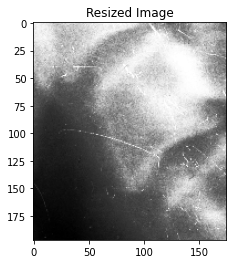

In [12]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Load the NumPy array
# a = cv2.imread('/Users/ssk/Downloads/SegPatch/split/train/absent/C00160_cervical_masks_4_image_4.png', cv2.IMREAD_GRAYSCALE)

# # Apply histogram equalization
# equalized_image = cv2.equalizeHist(a)

# # Plot the resized array
# plt.imshow(equalized_image, cmap='gray')  # Use 'gray' colormap for grayscale images
# plt.title('Resized Image')
# plt.show()

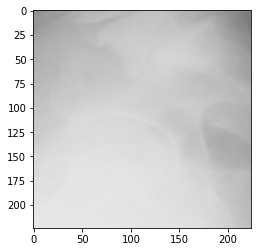

In [9]:
# import cv2
# import matplotlib.pyplot as plt

# # Load the image using cv2
# image = cv2.imread('/Users/ssk/Downloads/SegPatch/Split/train/present/L00419_lumbar_masks_4_image_1.png')

# # Define the new dimensions (width, height)
# new_width = 224  # Replace with your desired width
# new_height = 224  # Replace with your desired height

# # Resize the image
# resized_image = cv2.resize(image, (new_width, new_height))

# # Display the resized image (optional)
# plt.imshow(resized_image, cmap='rainbow')  # Use 'gray' colormap for grayscale images


In [35]:
!tree -L 2

.
├── Cervical
│   ├── image
│   └── mask
├── Data
│   ├── absent
│   └── present
├── Final_Segpatch.ipynb
├── Full_Segpatch.ipynb
├── Lumbar
│   ├── image
│   └── mask
├── Marks
│   ├── C
│   └── L
├── resnet50
├── Segpatch_F.ipynb
├── Segpatch.ipynb
├── split
│   ├── test
│   ├── train
│   └── val
├── trainer.py
└── weights

16 directories, 7 files
